<a href="https://colab.research.google.com/github/GavinButts/Fall-Data-Challenge-2022/blob/main/Code/Kevin/FSYESCNT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from IPython.display import HTML


In [27]:
!pip install pandas_alive
import pandas_alive


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 4.3 MB/s 
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.2.0
    Uninstalling Pillow-9.2.0:
      Successfully uninstalled Pillow-9.2.0


In [29]:
!pip install --upgrade Pillow
import PIL

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
#make sure to import csv file into colab and change df = pd.read_csv("CuratedData.csv") to reflect csv name

sheet_id = "11rno0SjsOyV1JlevH3q40UMm1s5e6m7g"
sheet_name = "curated_2019-required"

url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

#length of csv
dfLength = 15500

In [223]:
#create FSYESCNT variable that determines the amount of times each person said 'Yes' on the FS#### questions (ITEMS 60)
#Legend:  Number of 'Yes'

FSYESCNT = []      #variable that will be added to csv
yesCount = 0
FSYESCNT_LMH = []

for i in range(15500):
  if df['FSSPORTX'][i] == 1:
    yesCount += 1
  if df['FSVOL'][i] == 1:
    yesCount += 1
  if df['FSMTNG'][i] == 1:
    yesCount += 1
  if df['FSPTMTNG'][i] == 1:
    yesCount += 1
  if df['FSATCNFN'][i] == 1:
    yesCount += 1
  if df['FSFUNDRS'][i] == 1:
    yesCount += 1
  if df['FSCOMMTE'][i] == 1:
    yesCount += 1
  if df['FSCOUNSLR'][i] == 1:
    yesCount += 1
  FSYESCNT.append(yesCount)
  if yesCount <= 3:
    FSYESCNT_LMH.append('1) LOW INVOLVMENT')
  elif yesCount > 3 and yesCount<=5:
    FSYESCNT_LMH.append('2) MEDIUM INVOLVEMENT')
  elif yesCount > 5:
    FSYESCNT_LMH.append('3) HIGH INVOLVEMENT')
  yesCount = 0

df["FSYESCNT"] = FSYESCNT
df["FSYESCNT_LMH"] = FSYESCNT_LMH

df.to_csv("sample.csv", index=False)  #adds variable to csv


ValueError: ignored

<Figure size 900x900 with 1 Axes>

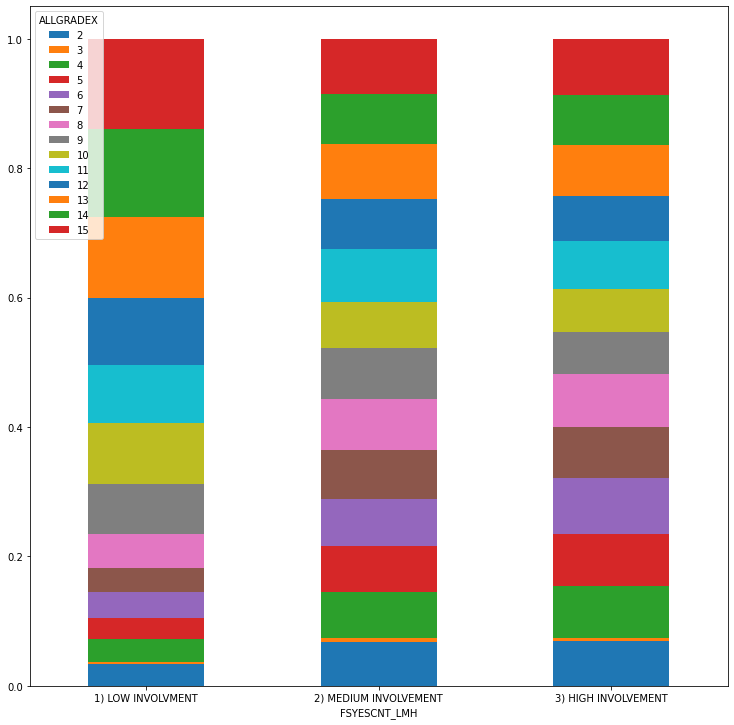

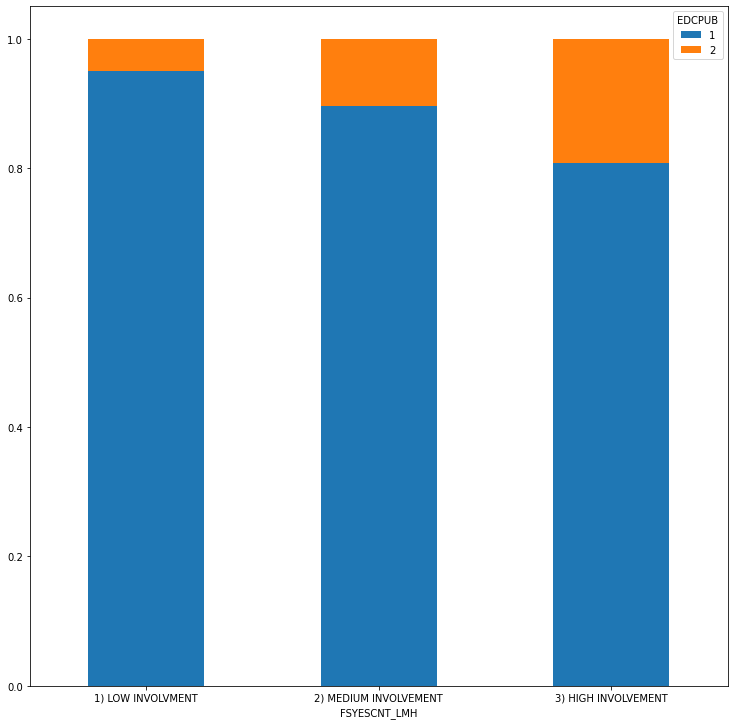

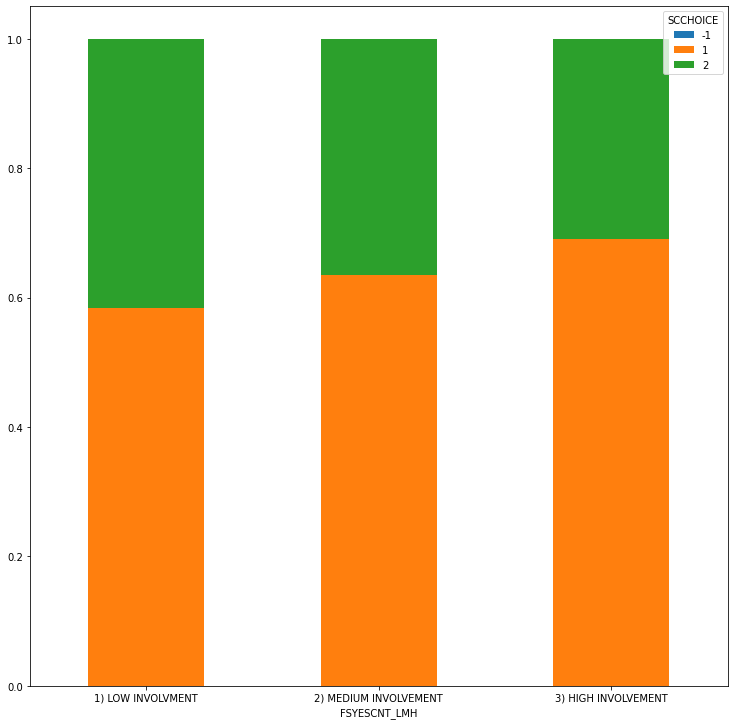

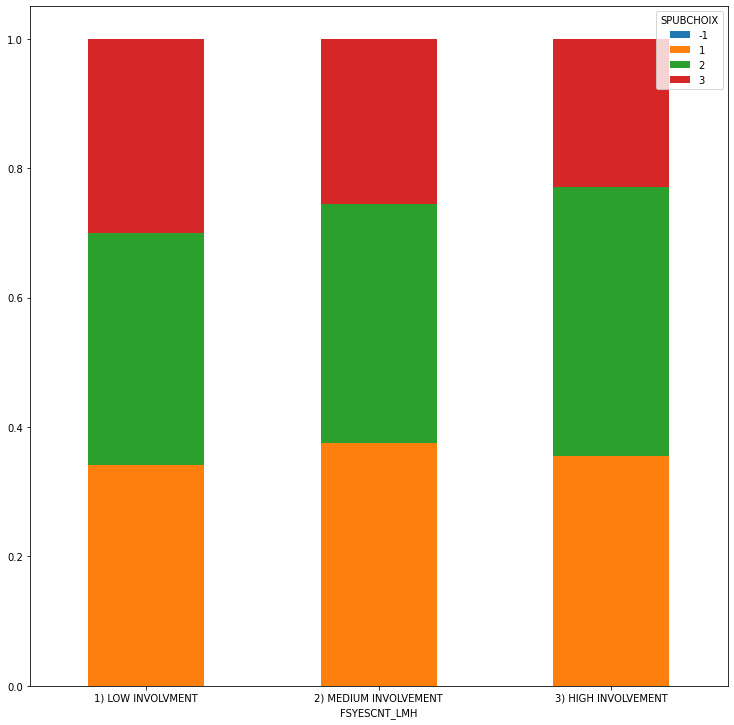

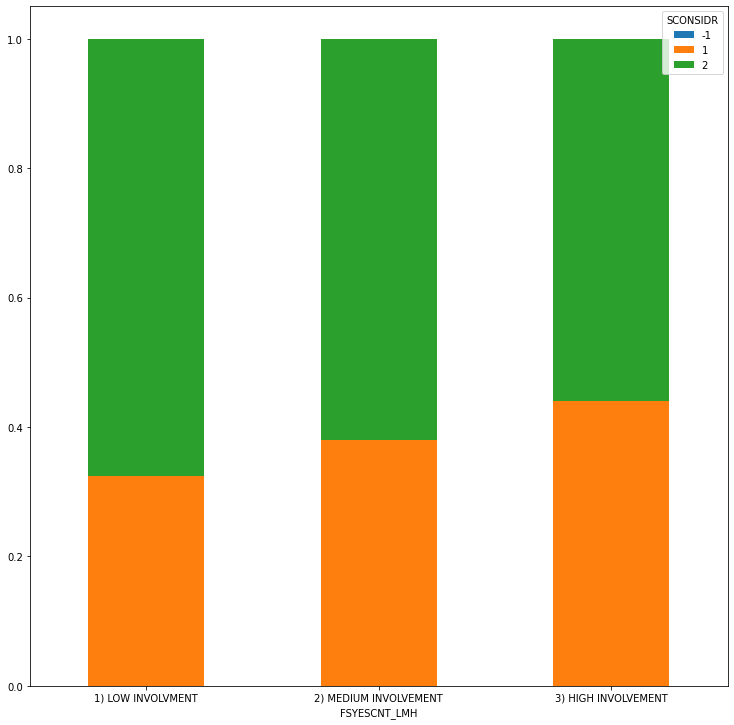

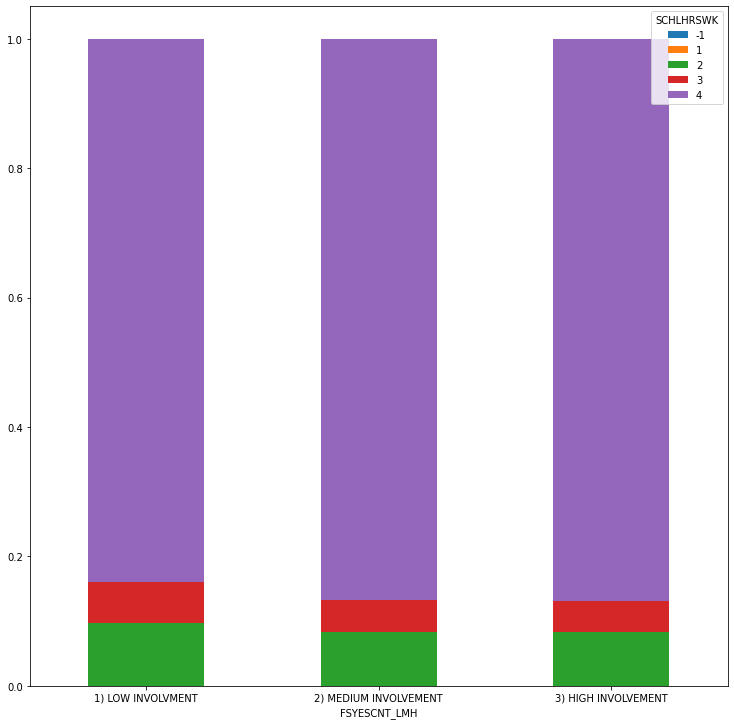

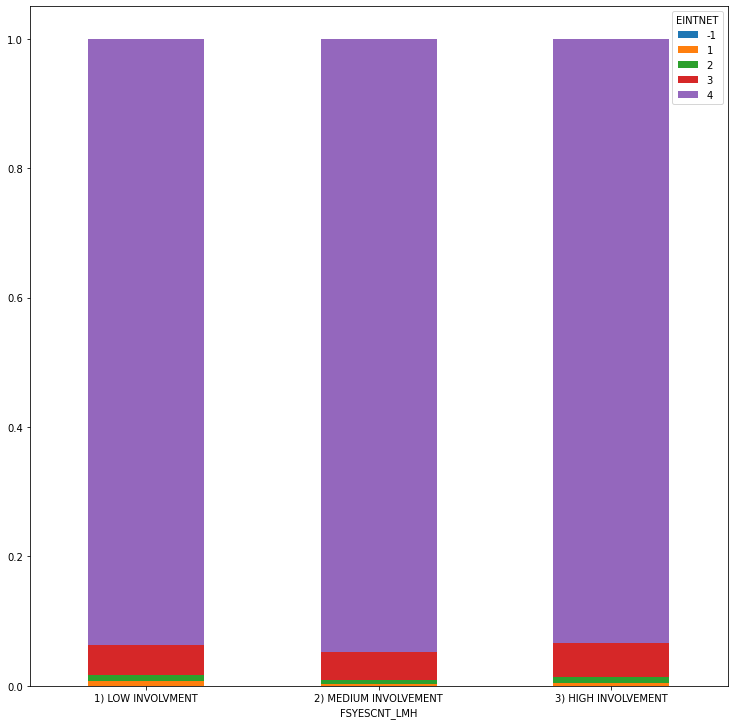

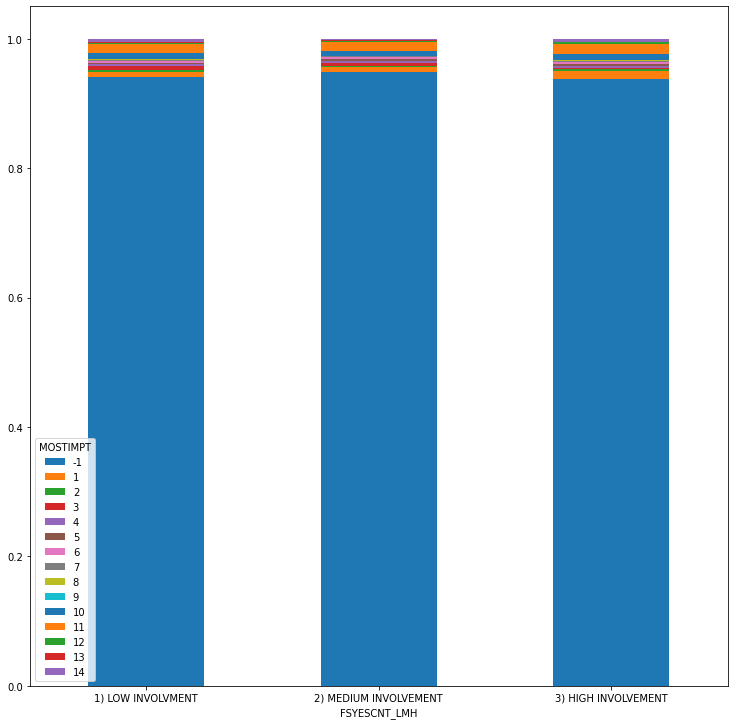

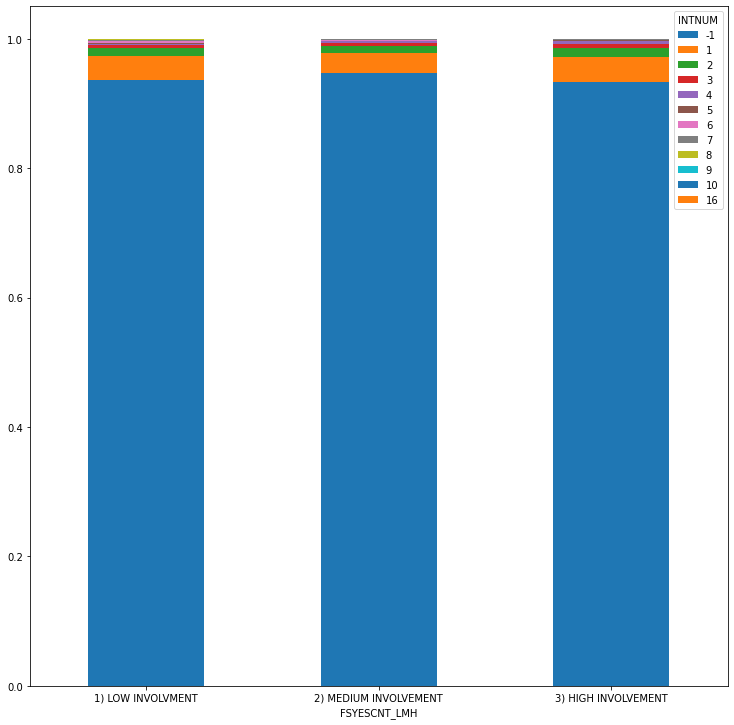

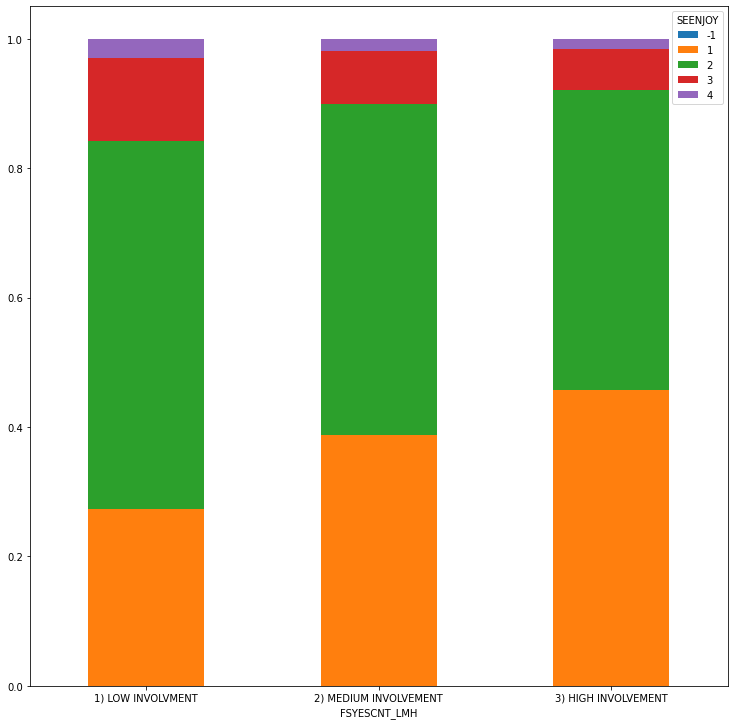

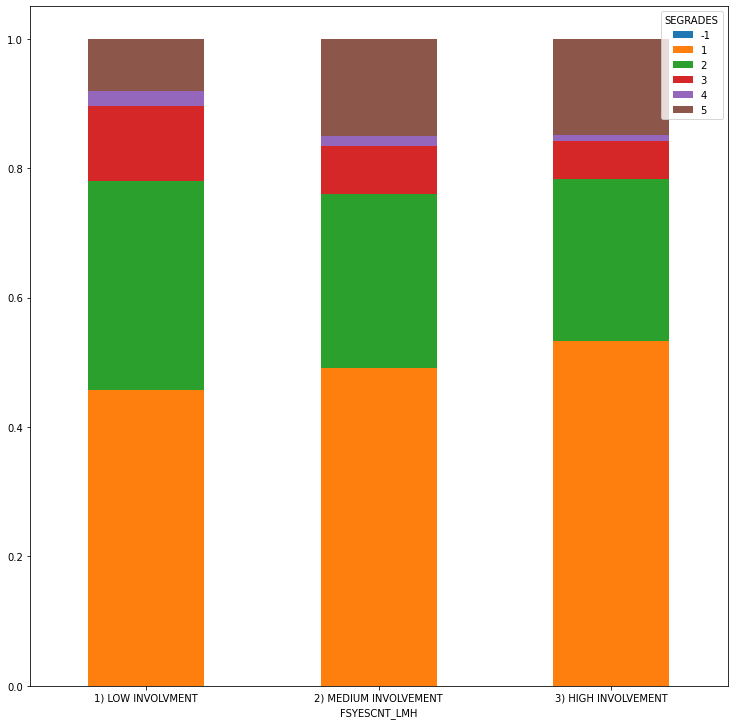

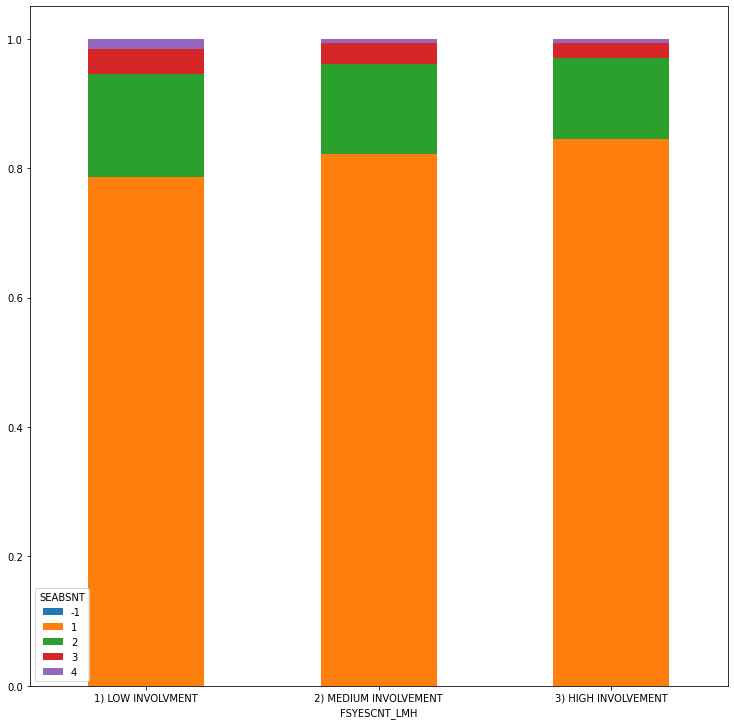

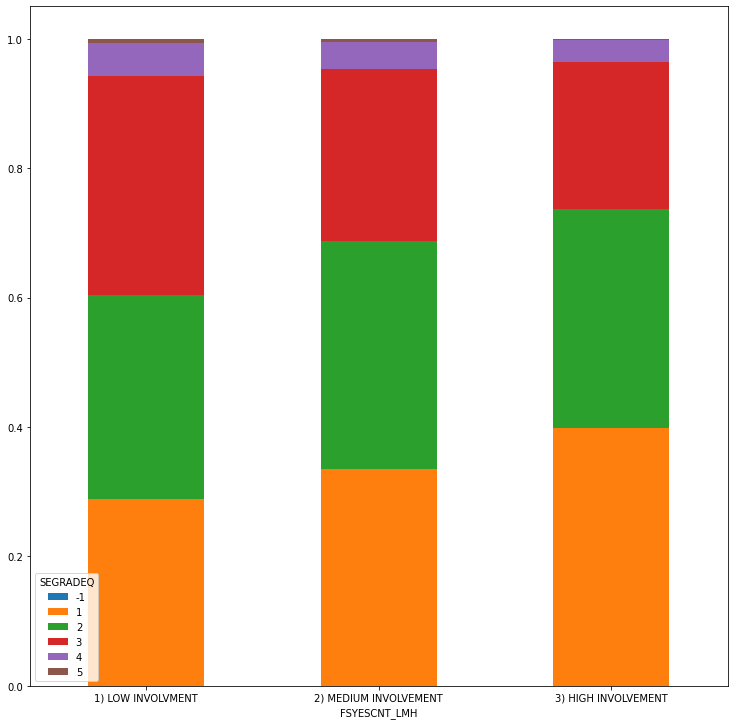

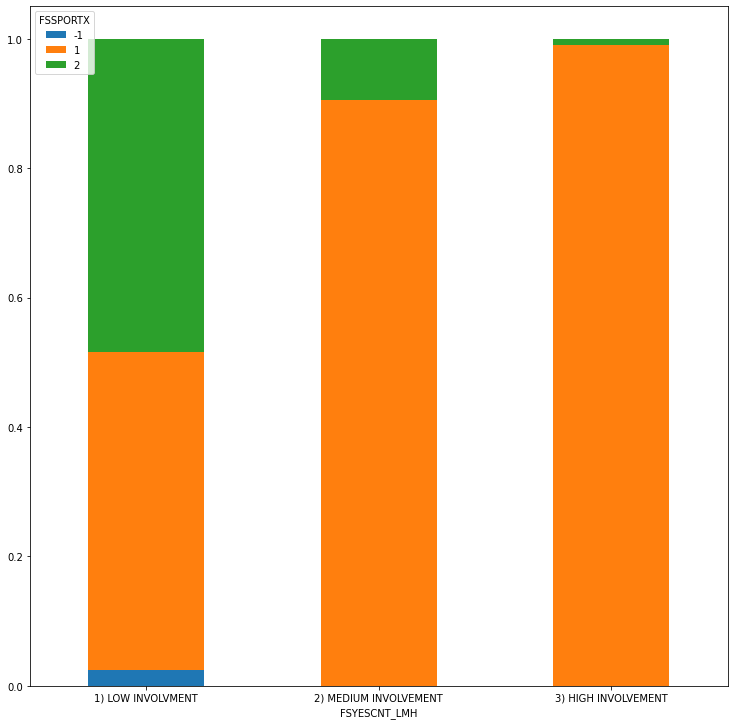

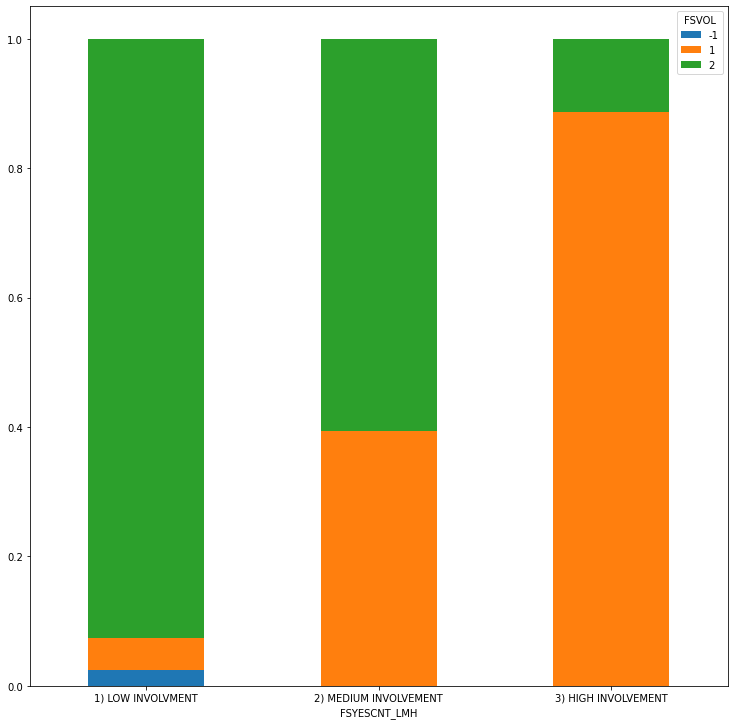

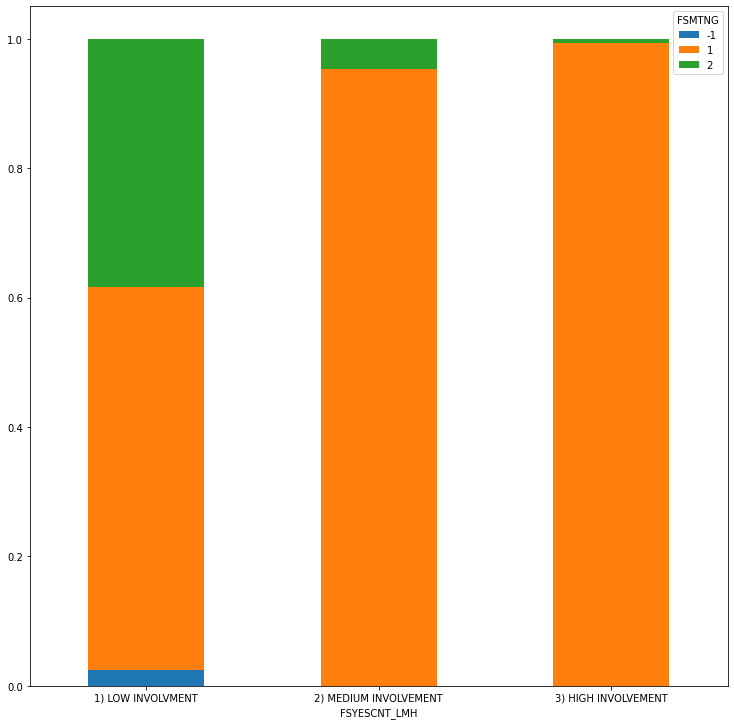

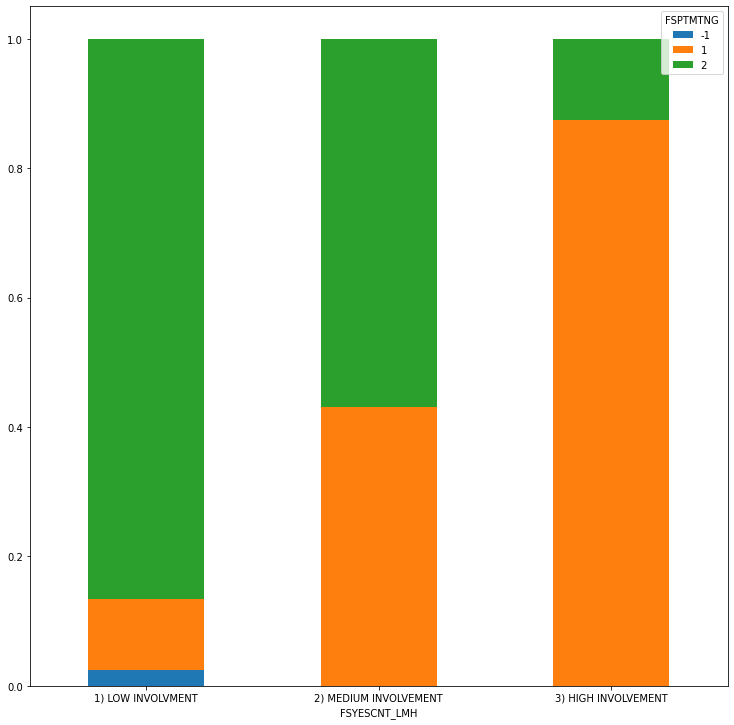

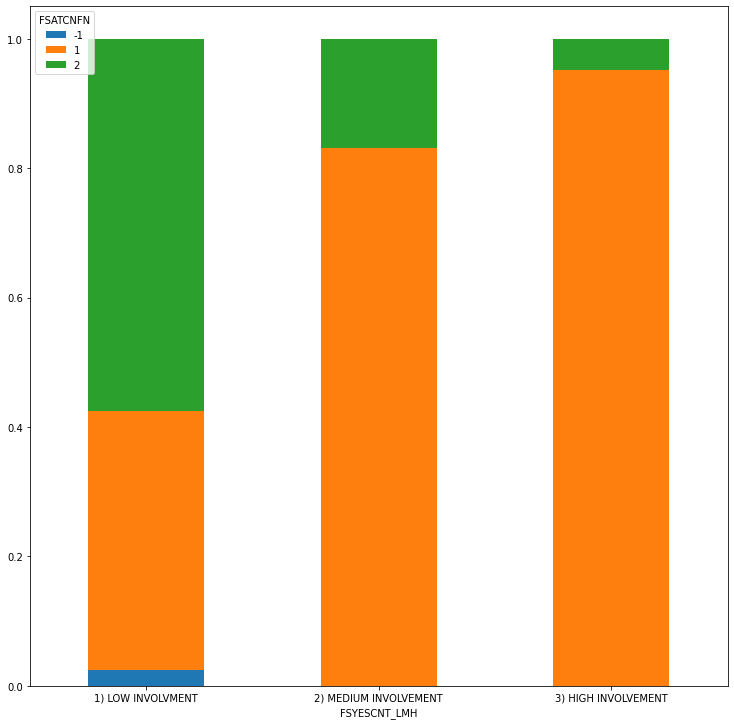

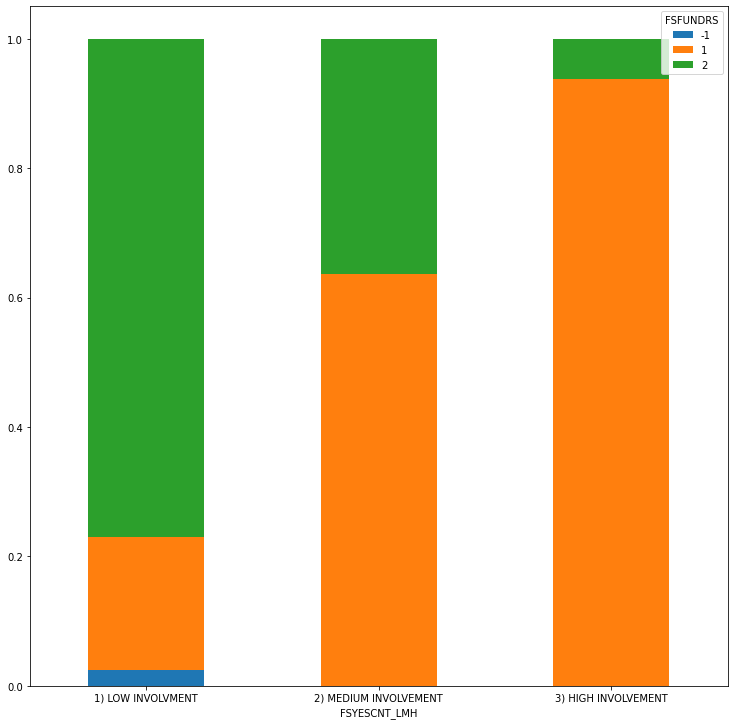

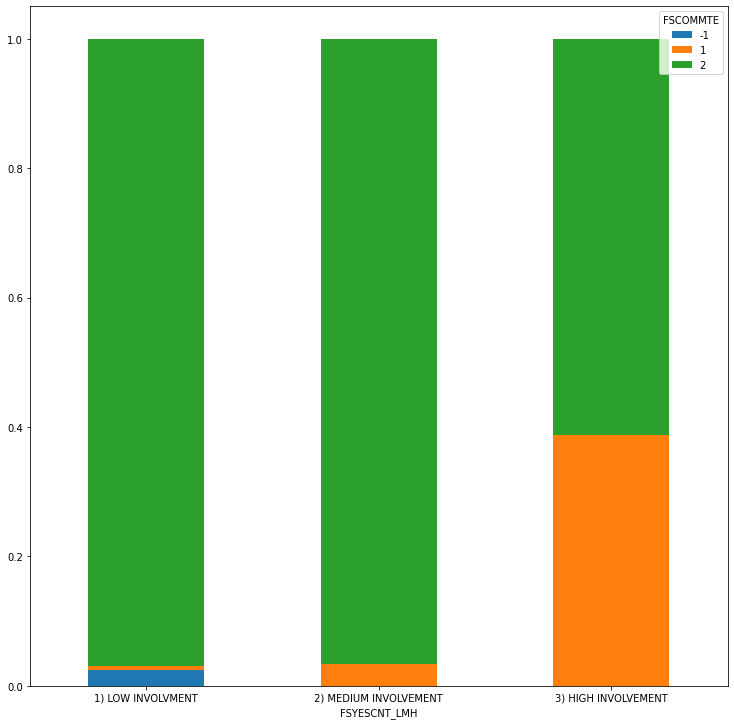

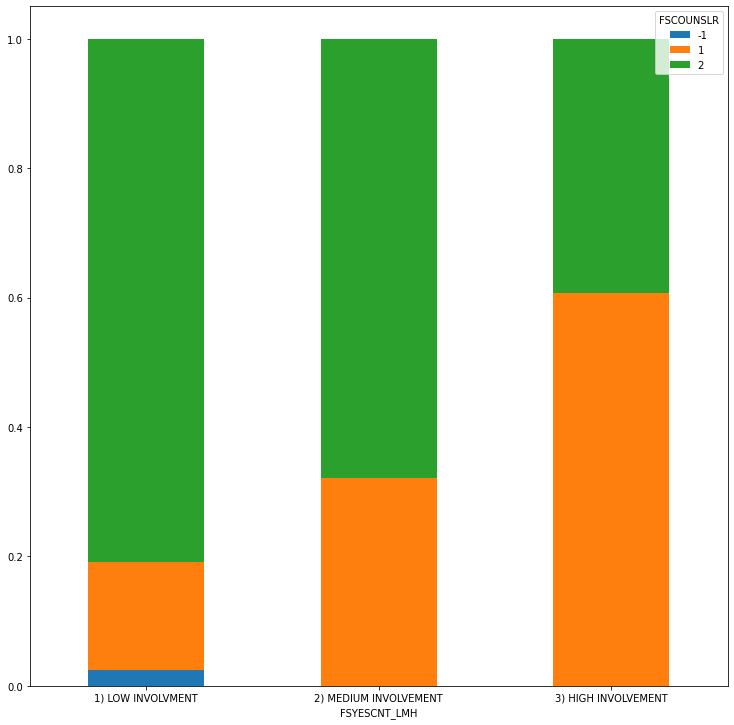

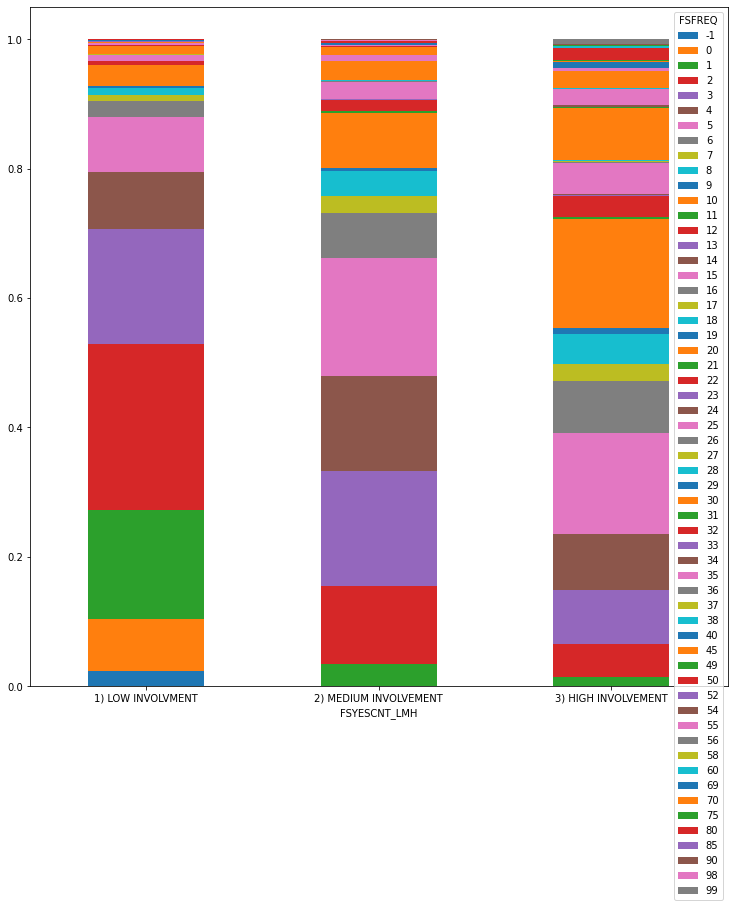

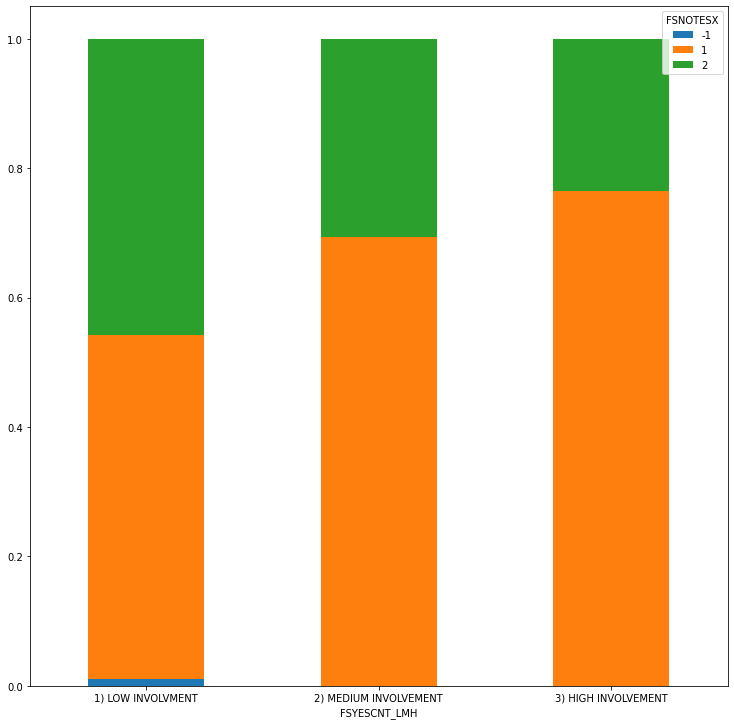

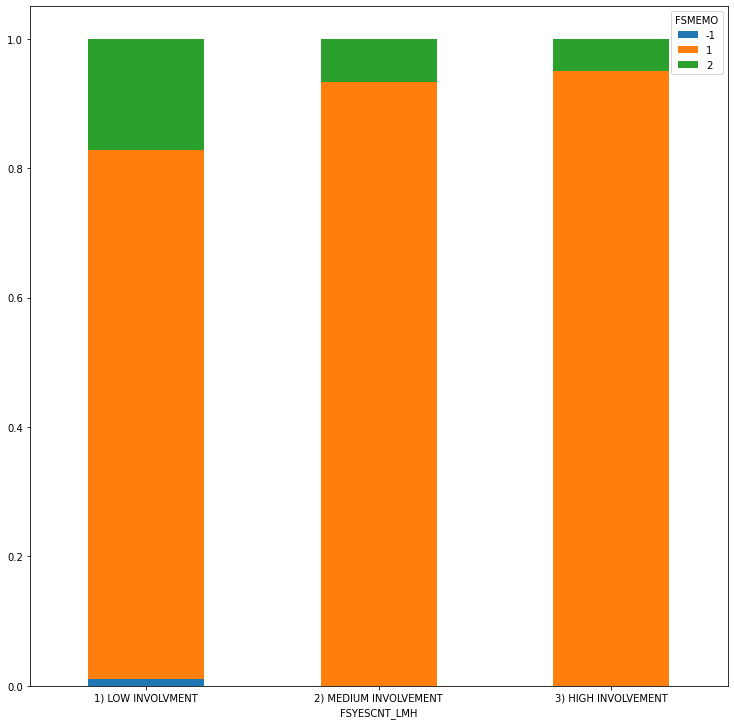

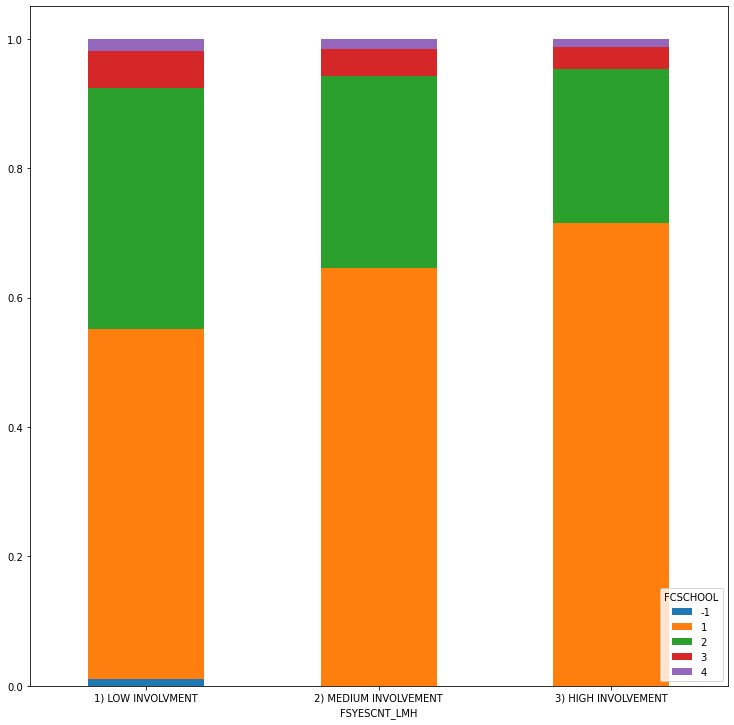

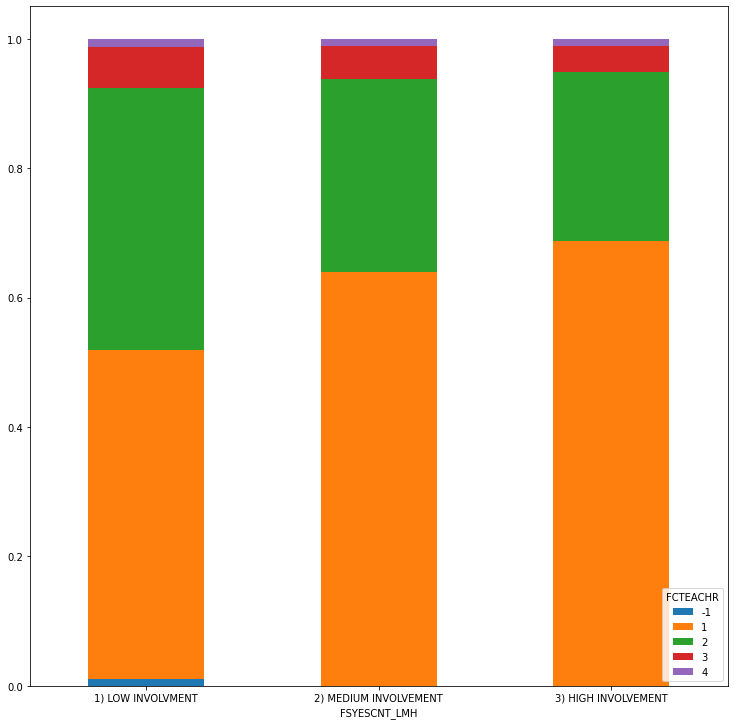

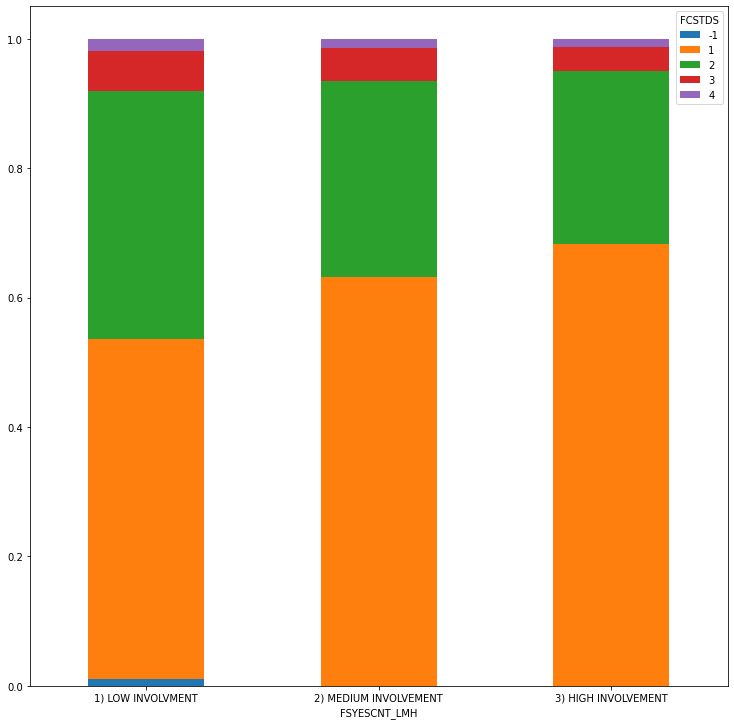

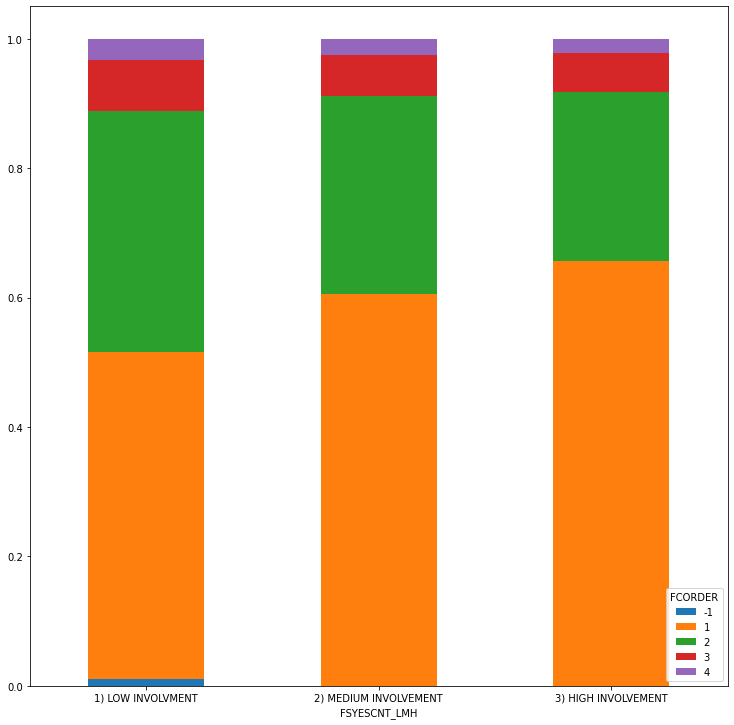

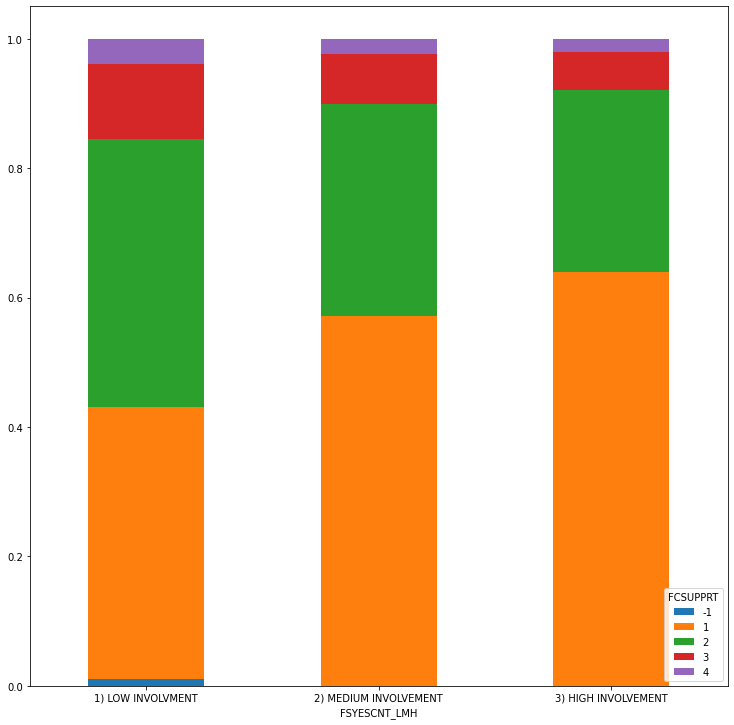

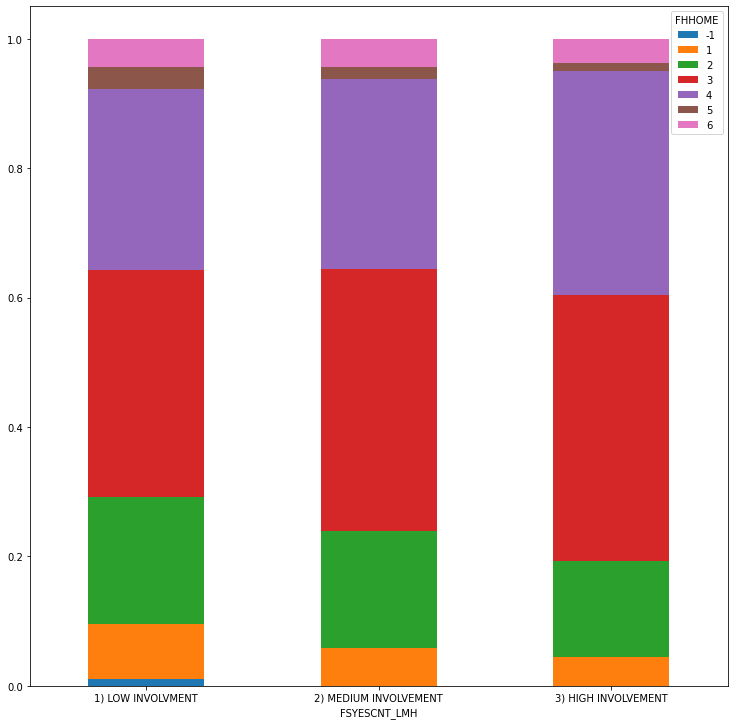

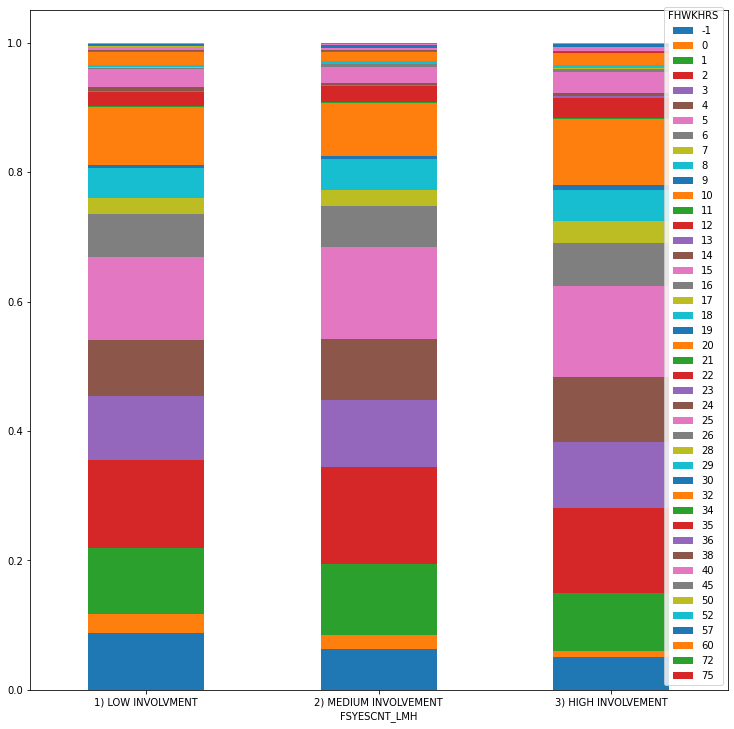

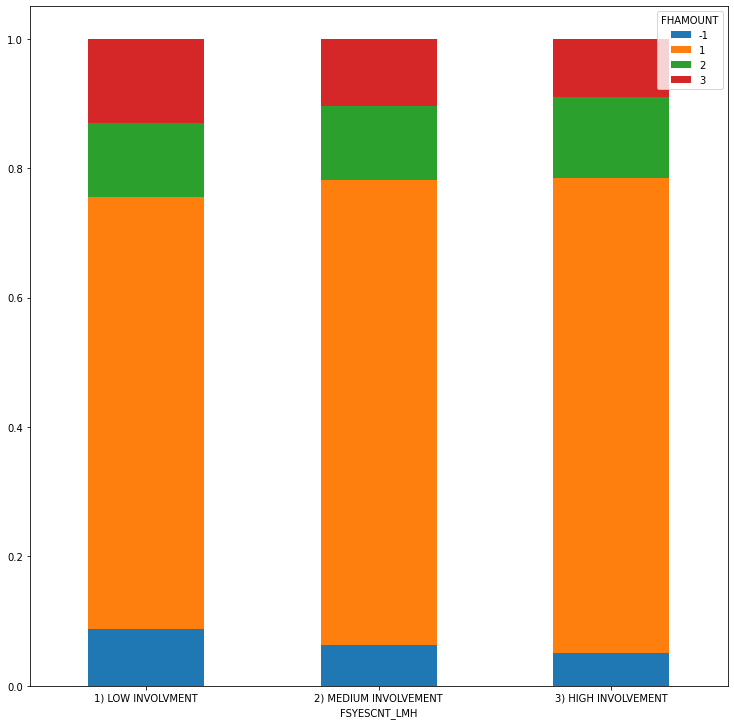

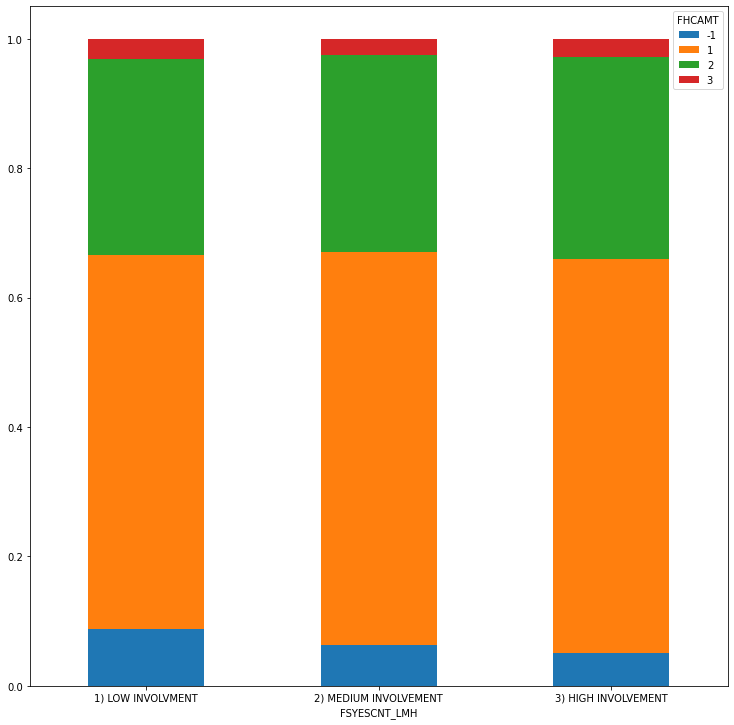

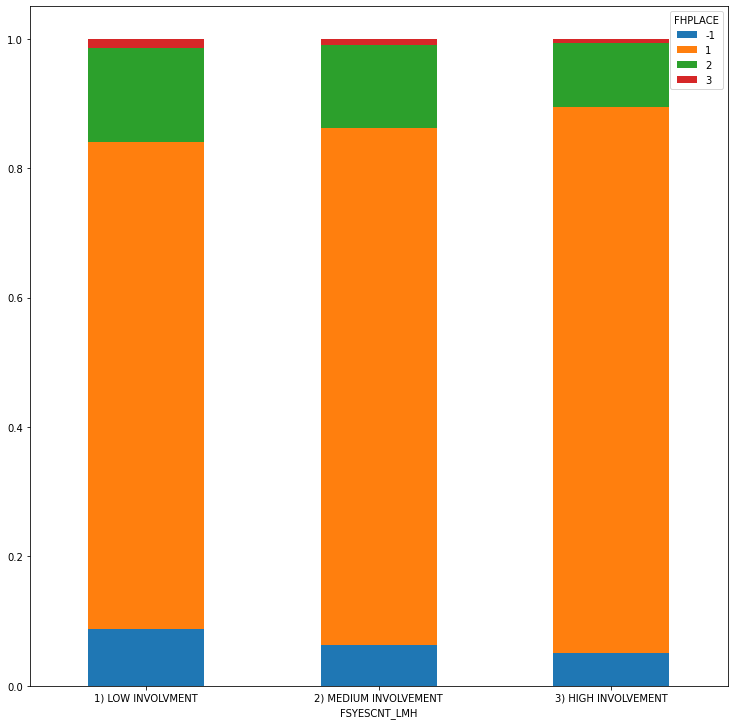

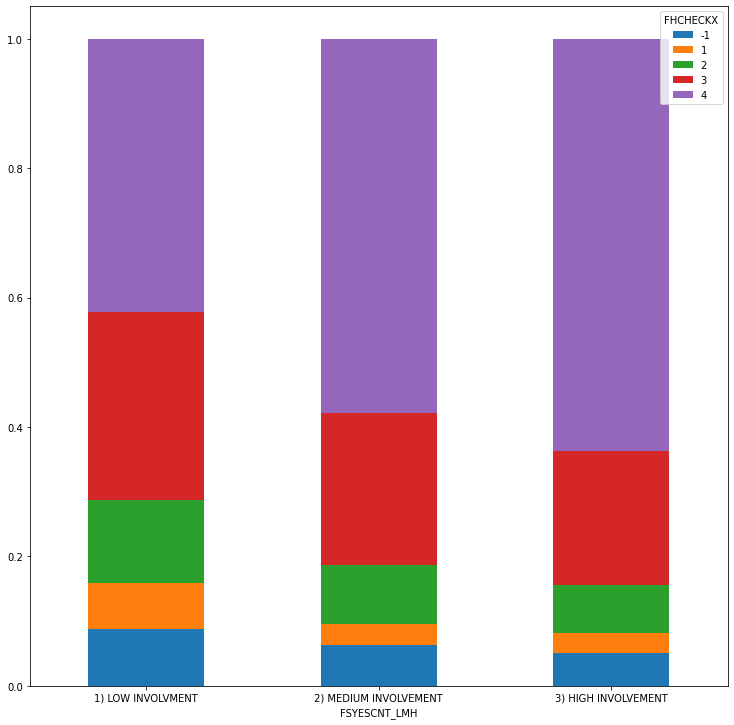

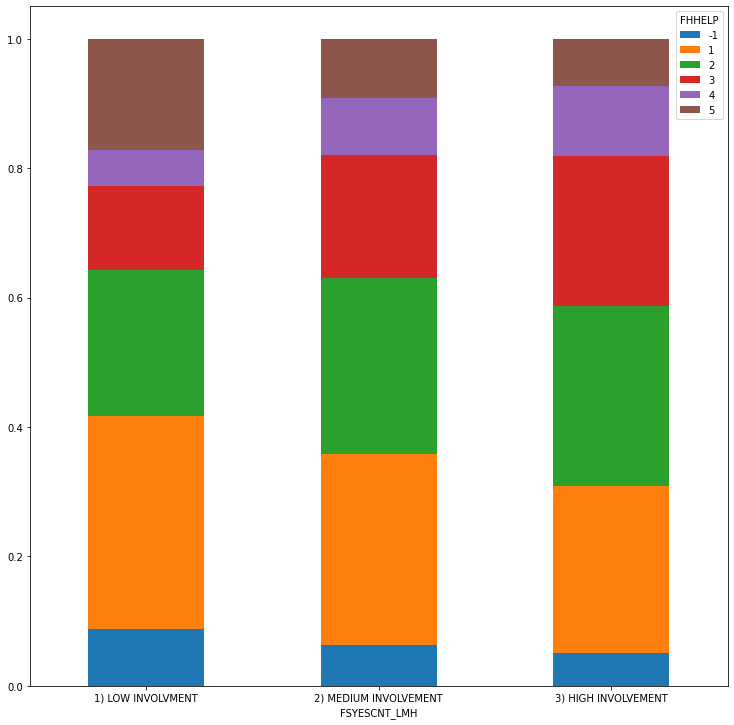

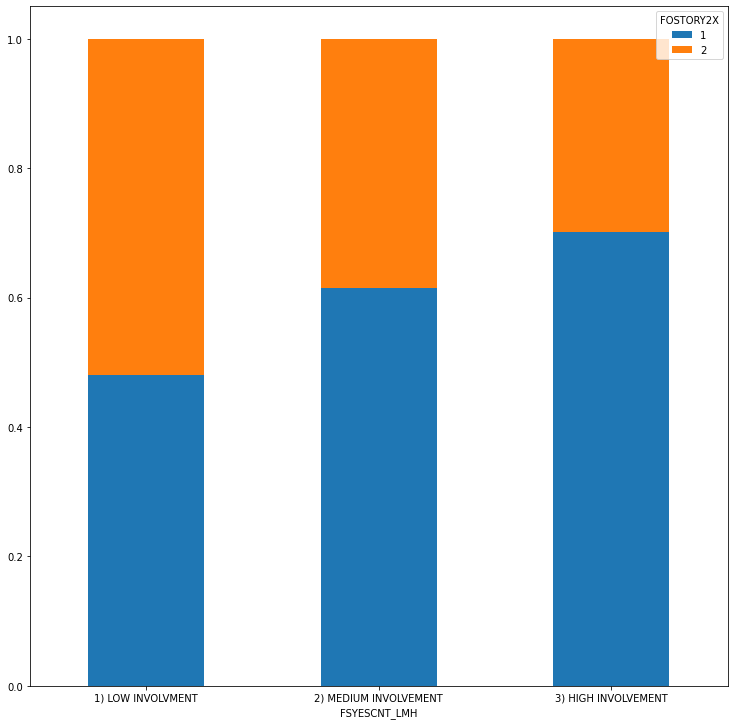

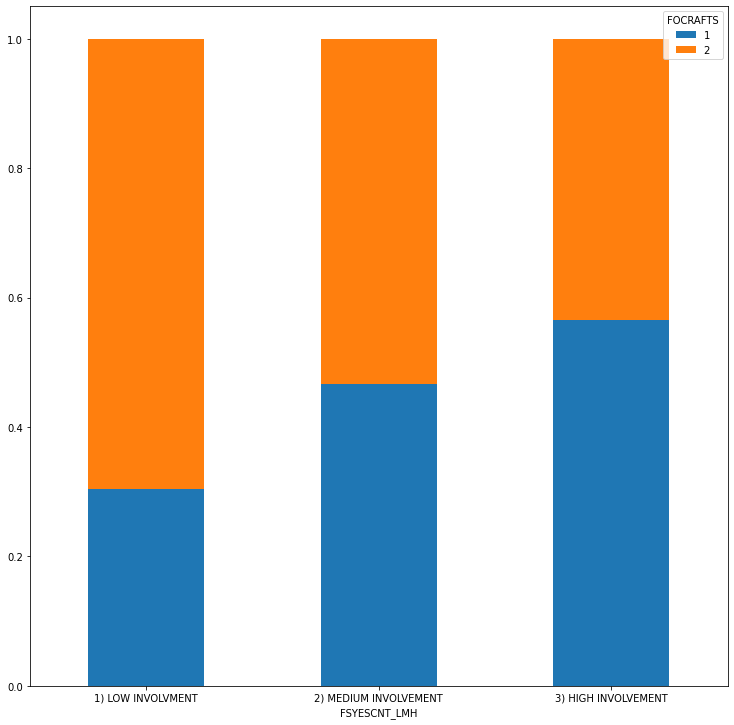

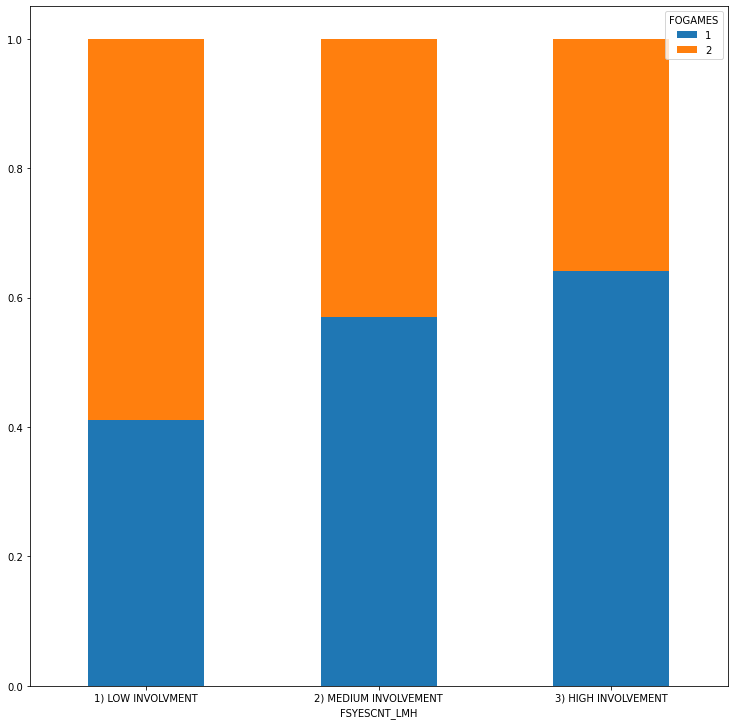

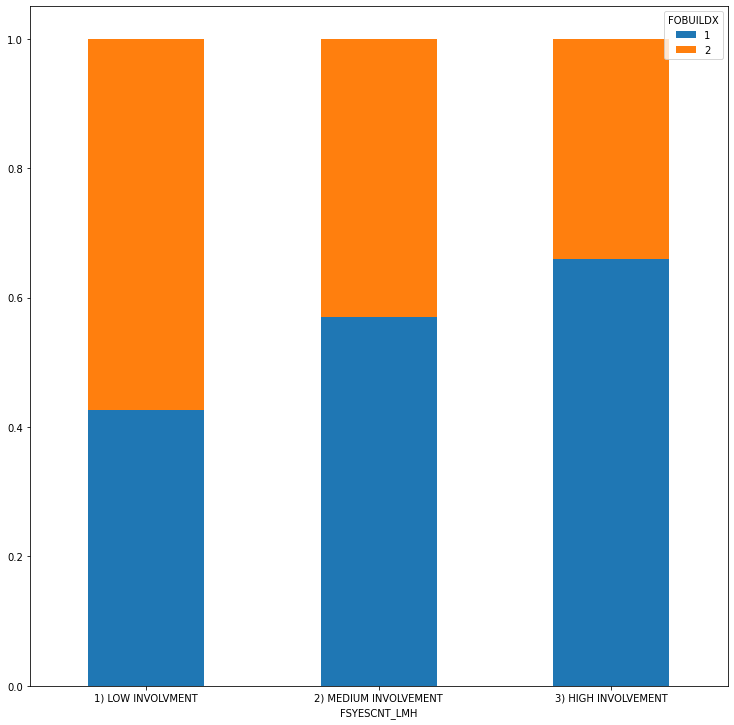

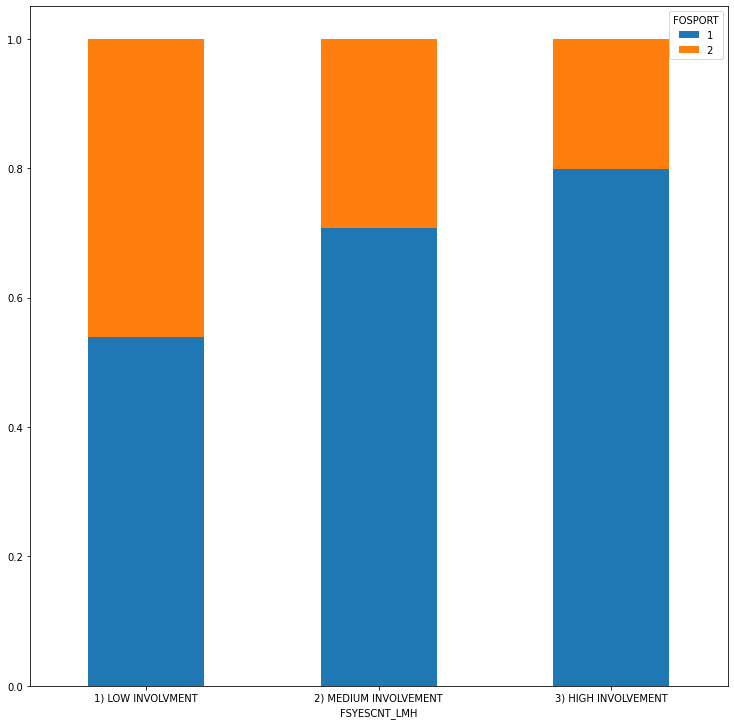

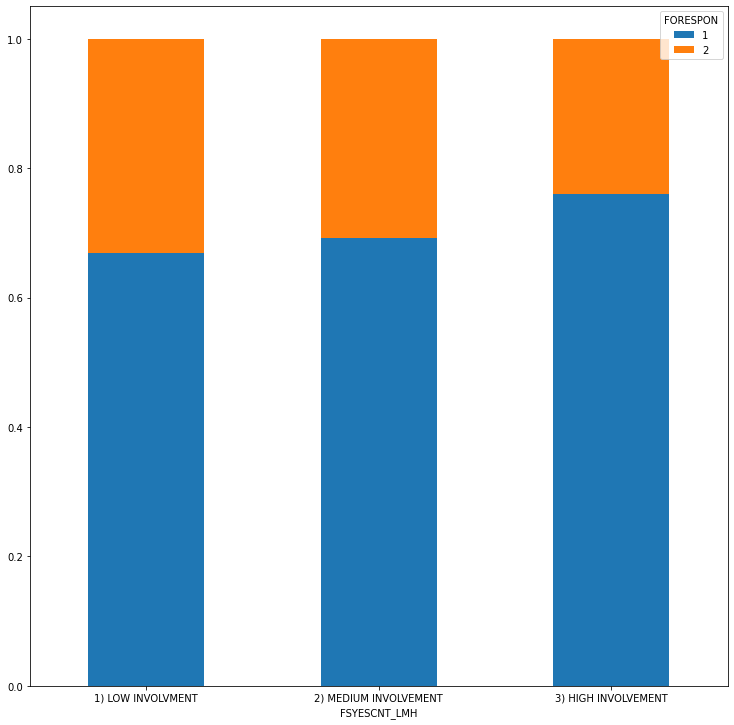

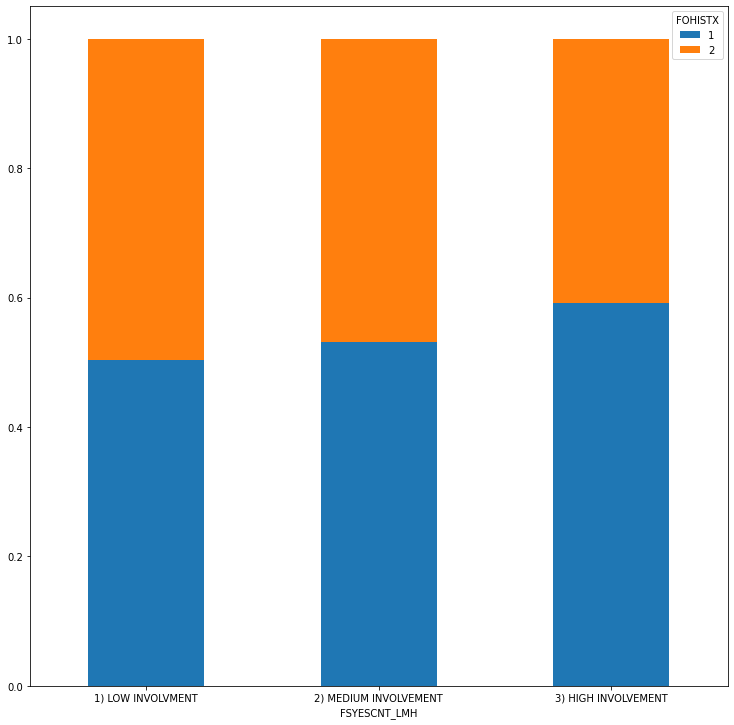

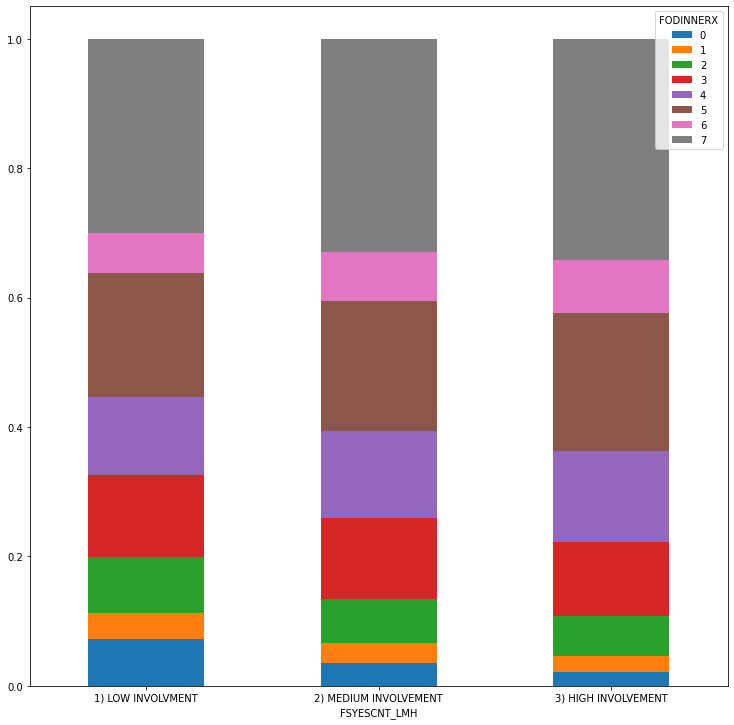

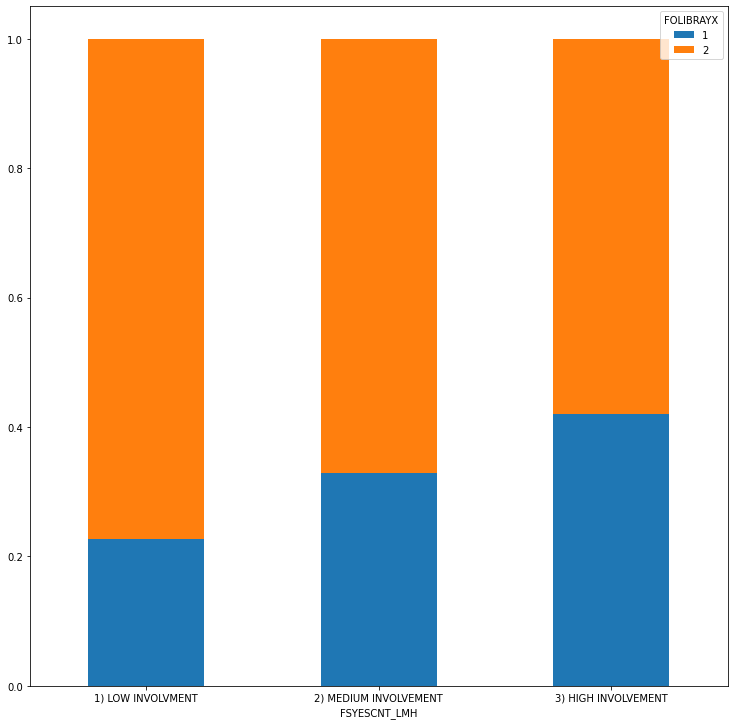

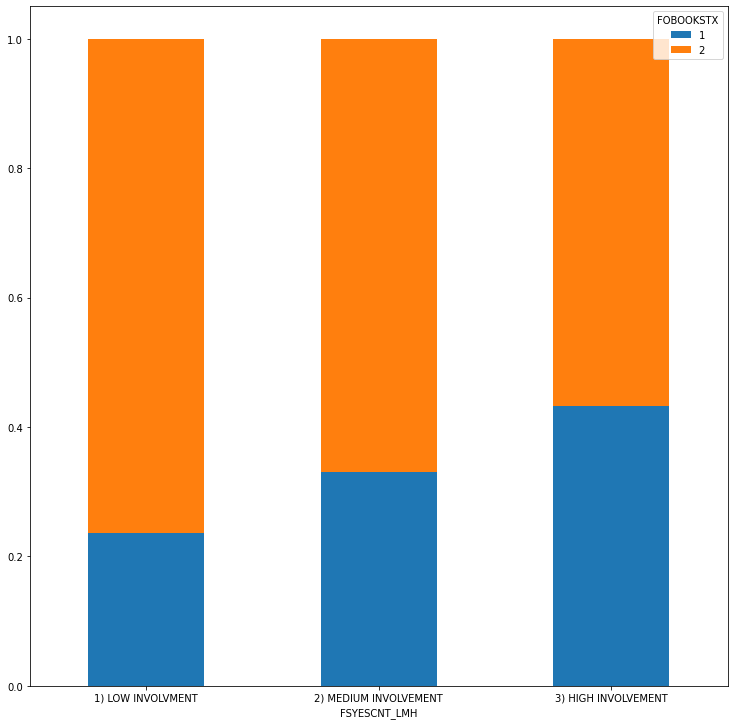

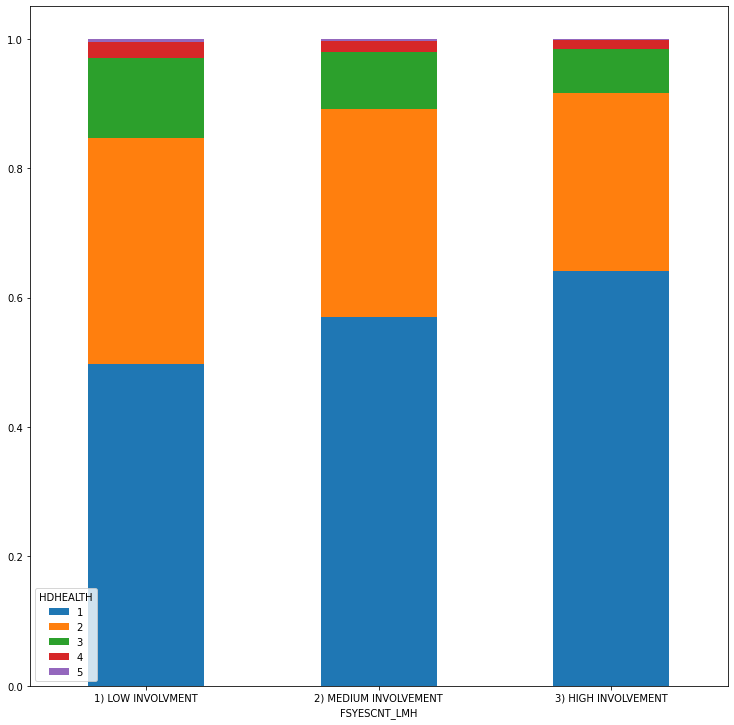

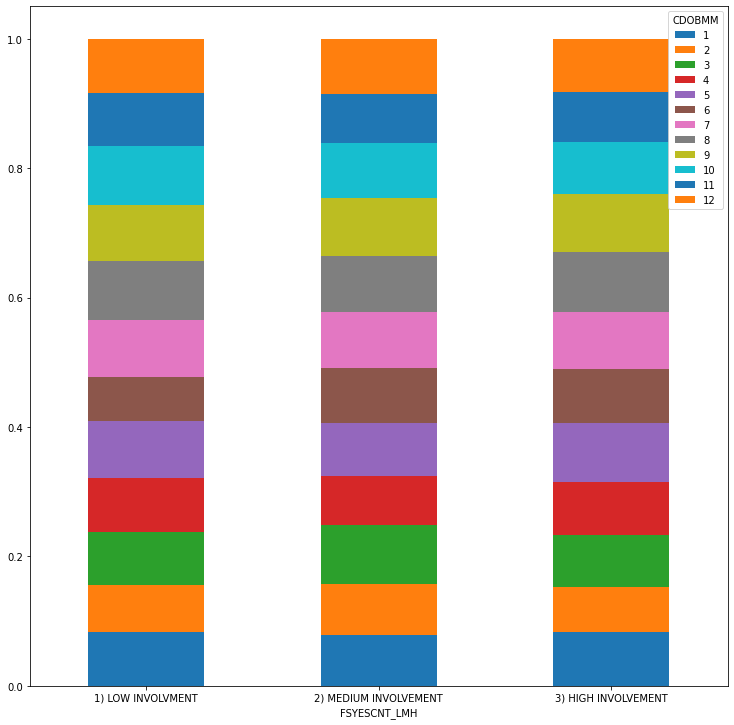

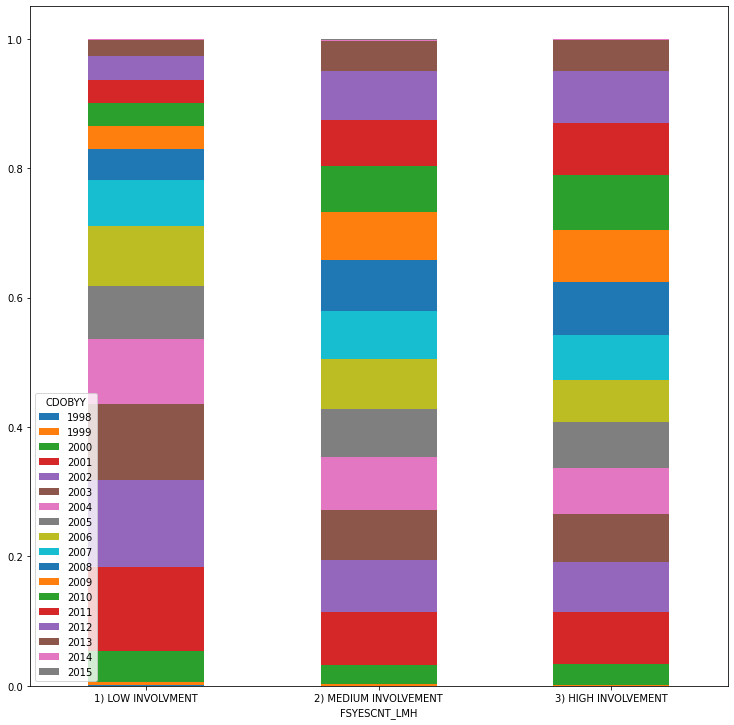

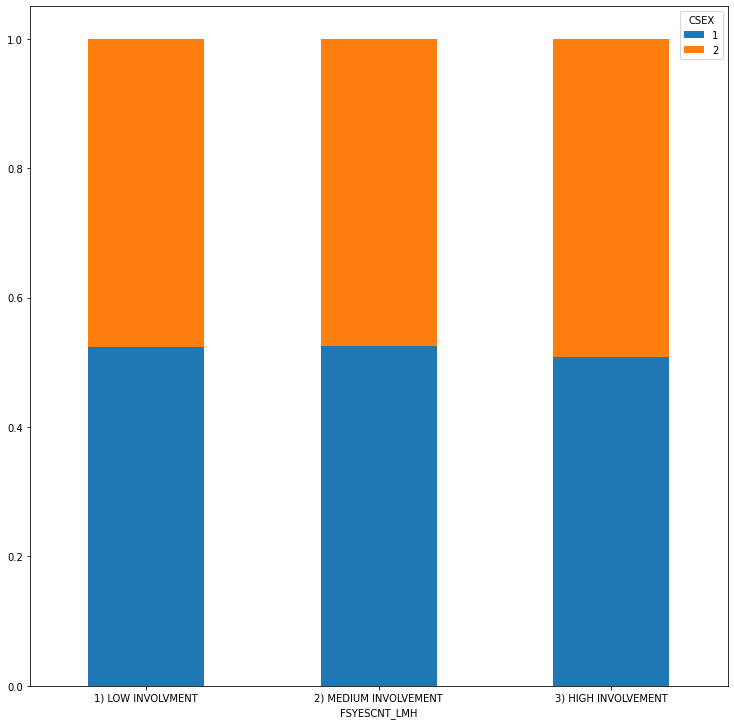

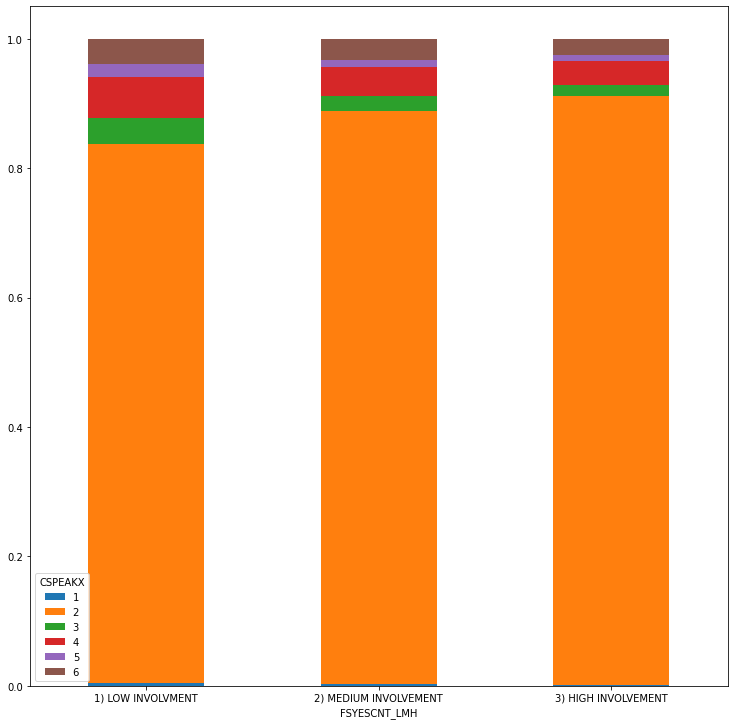

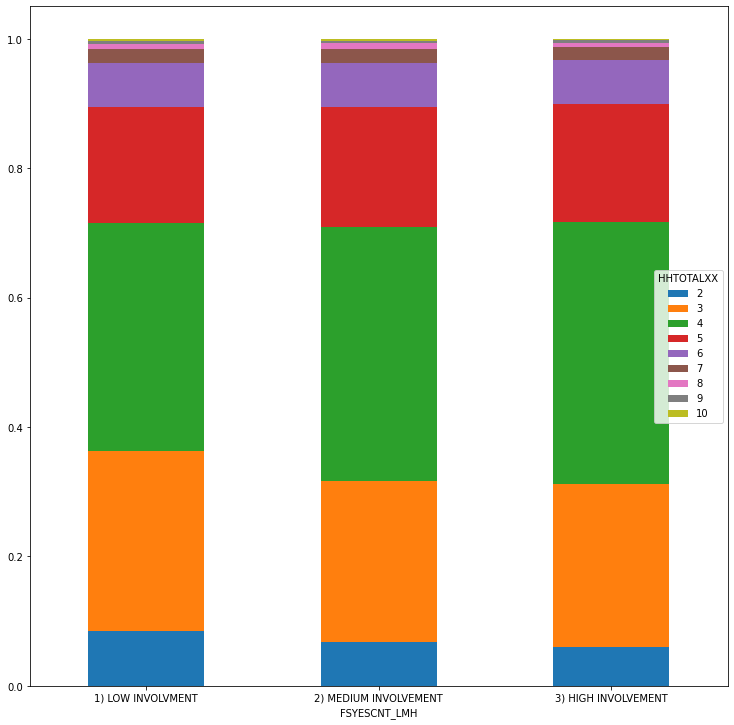

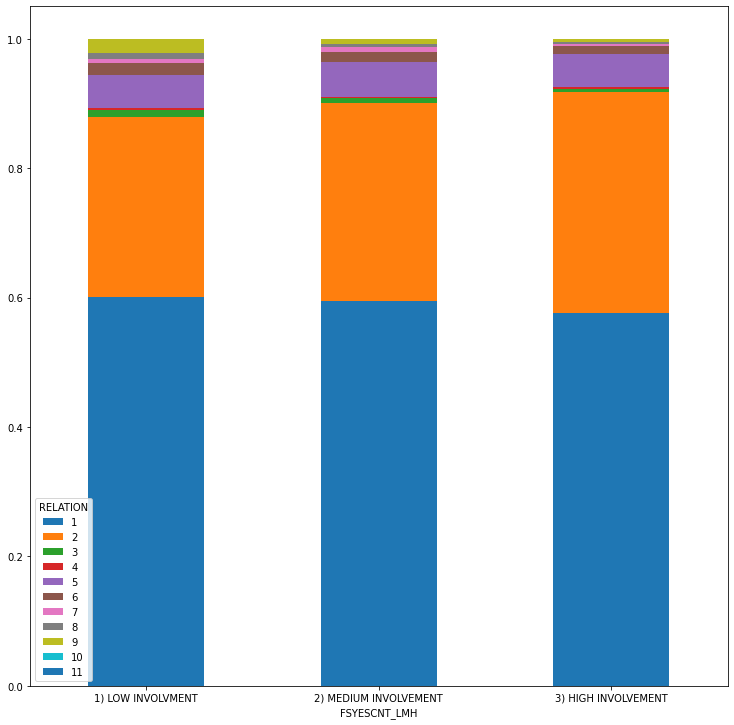

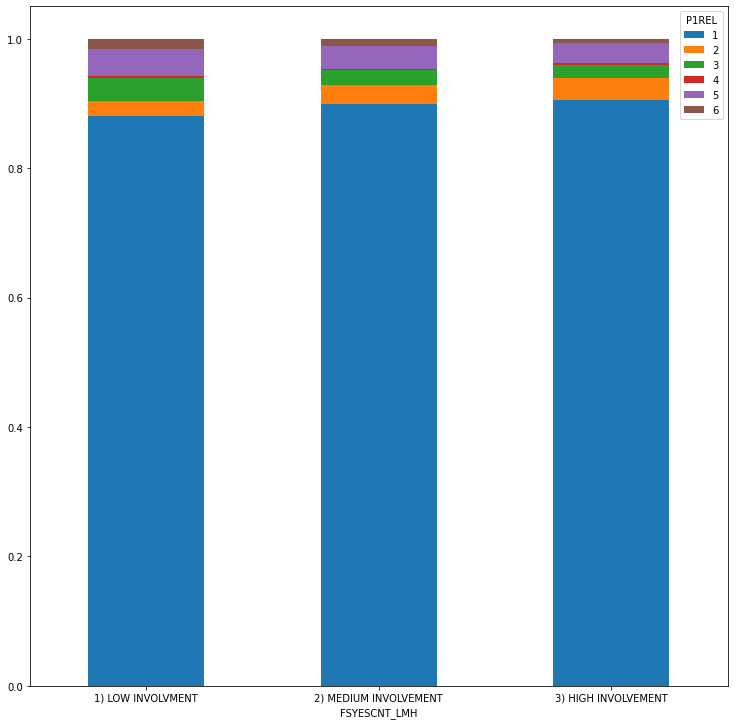

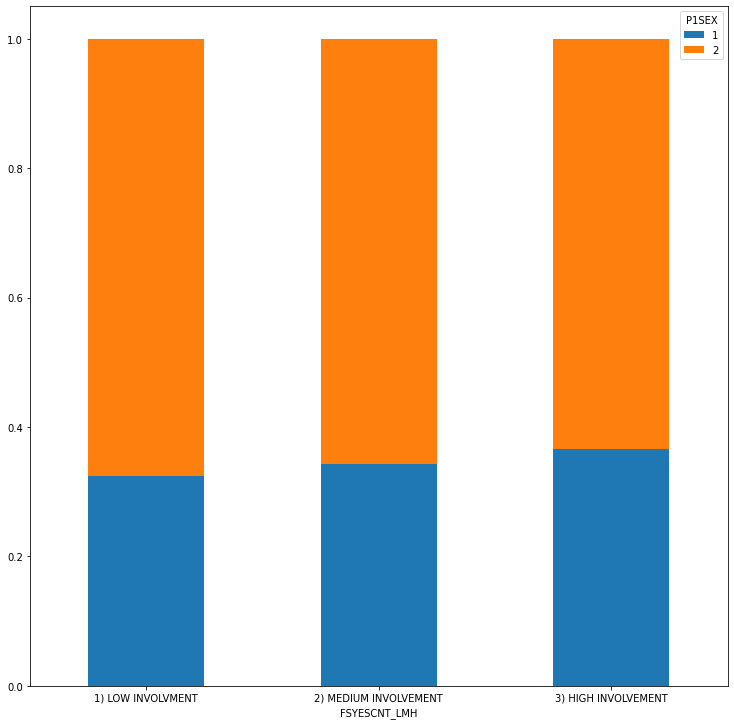

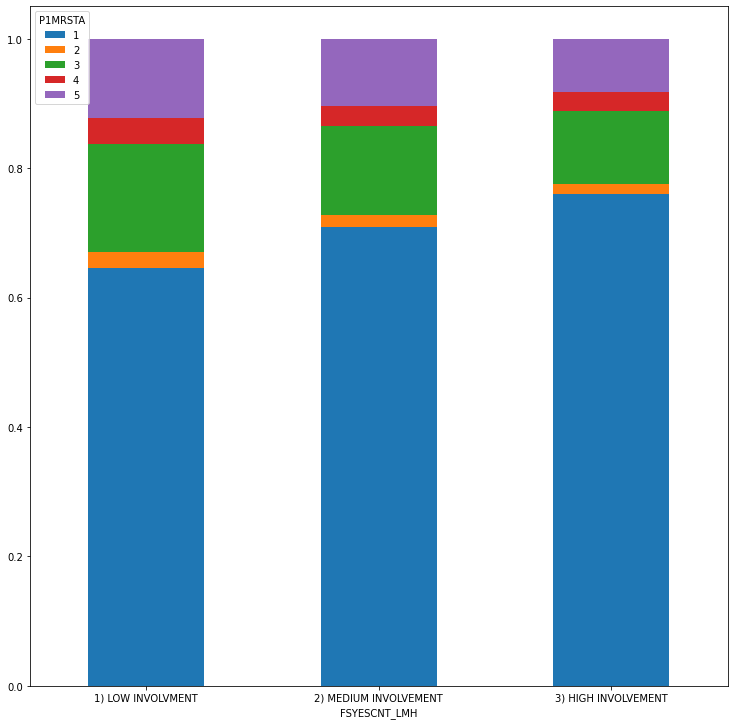

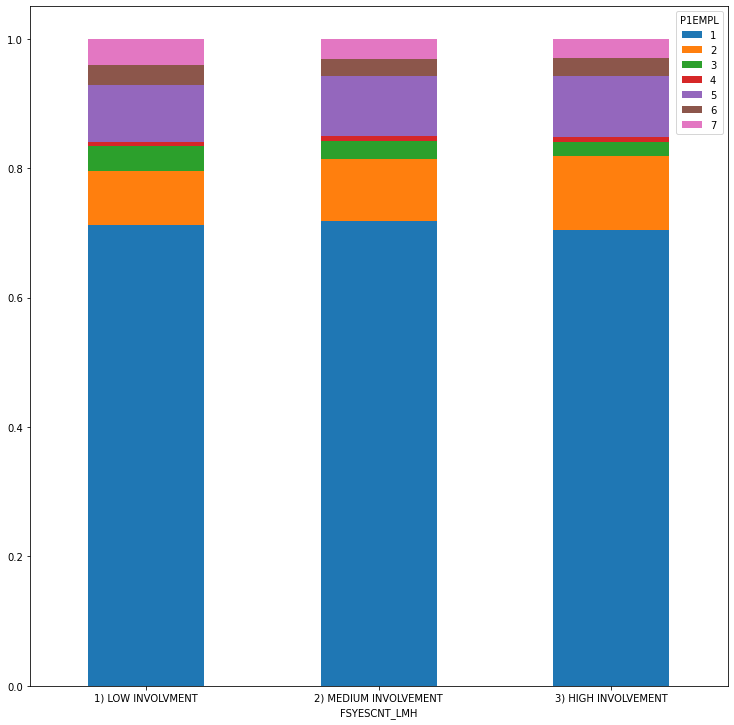

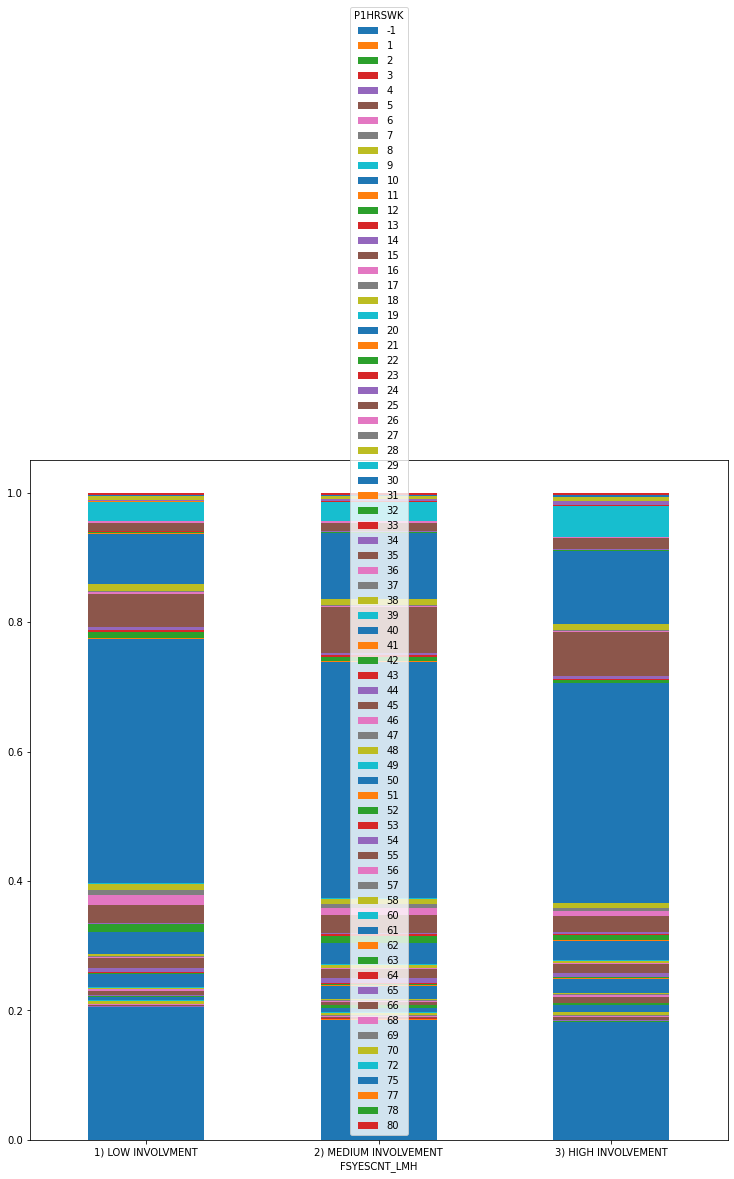

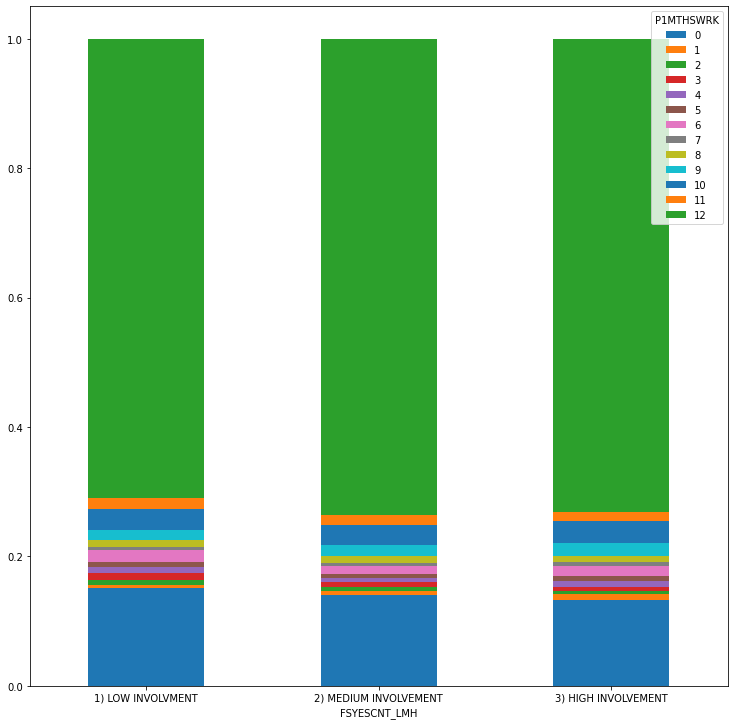

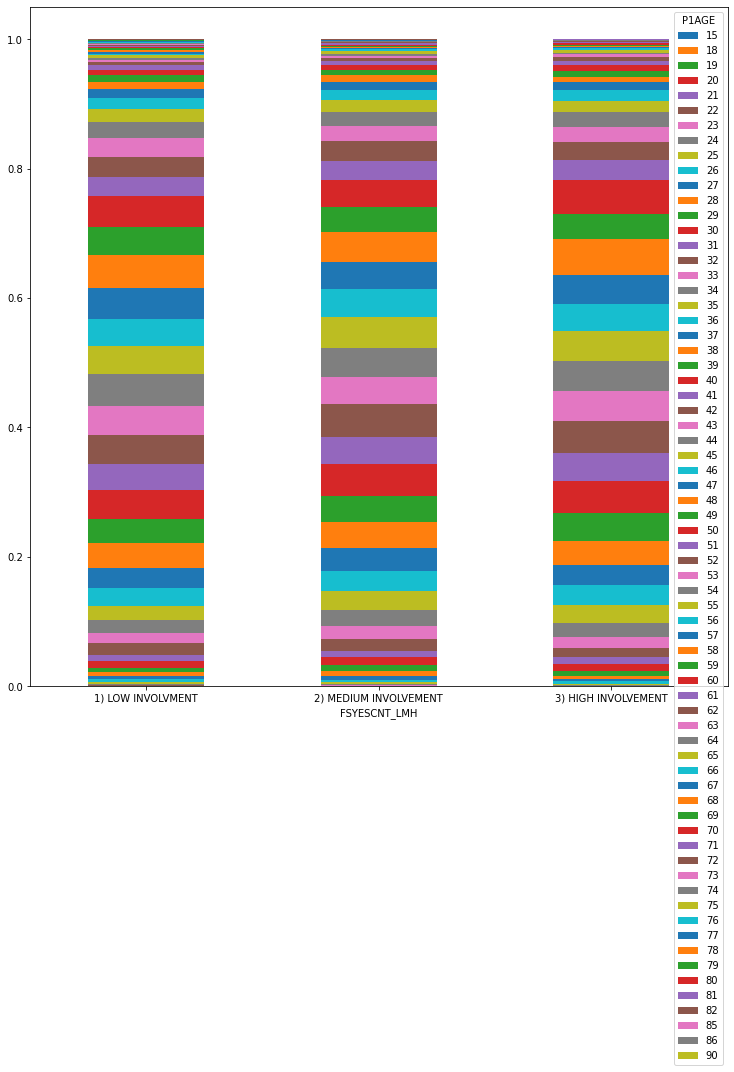

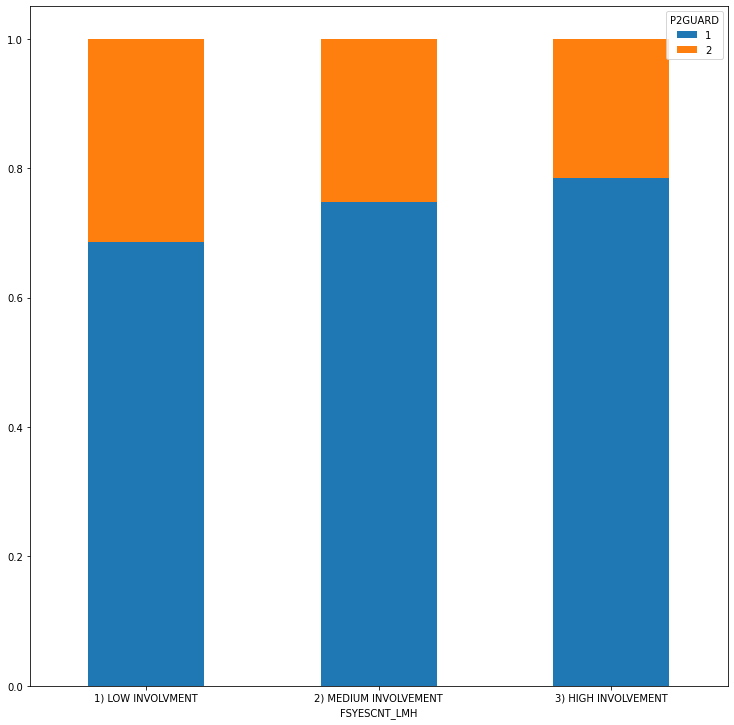

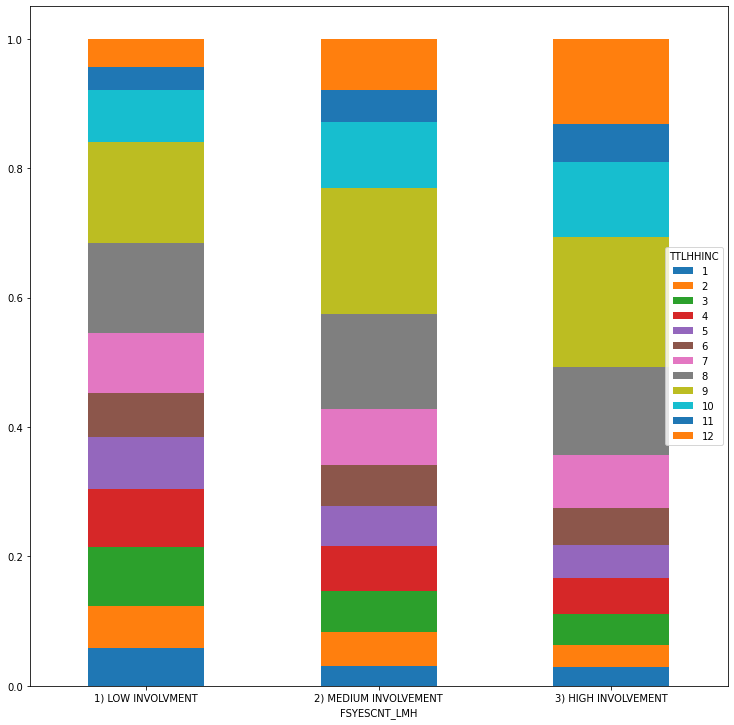

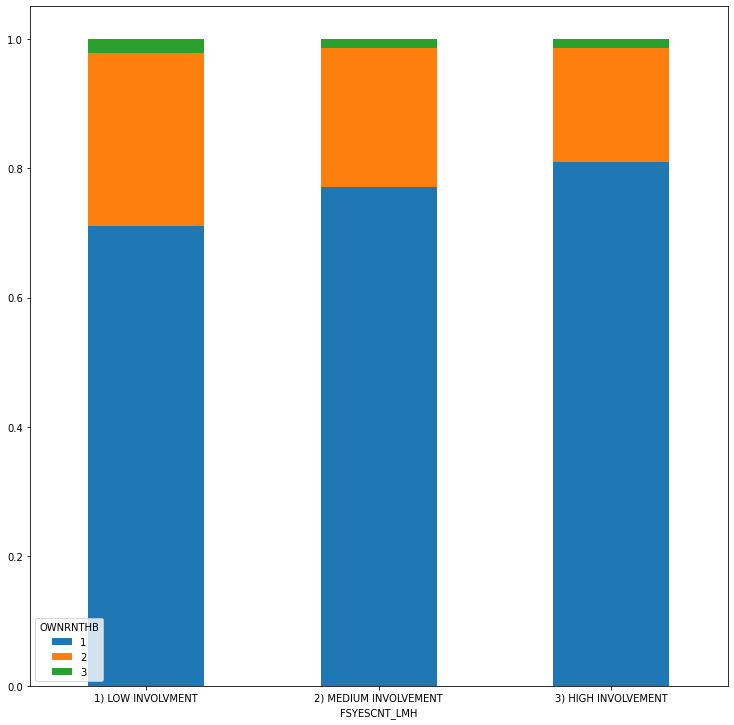

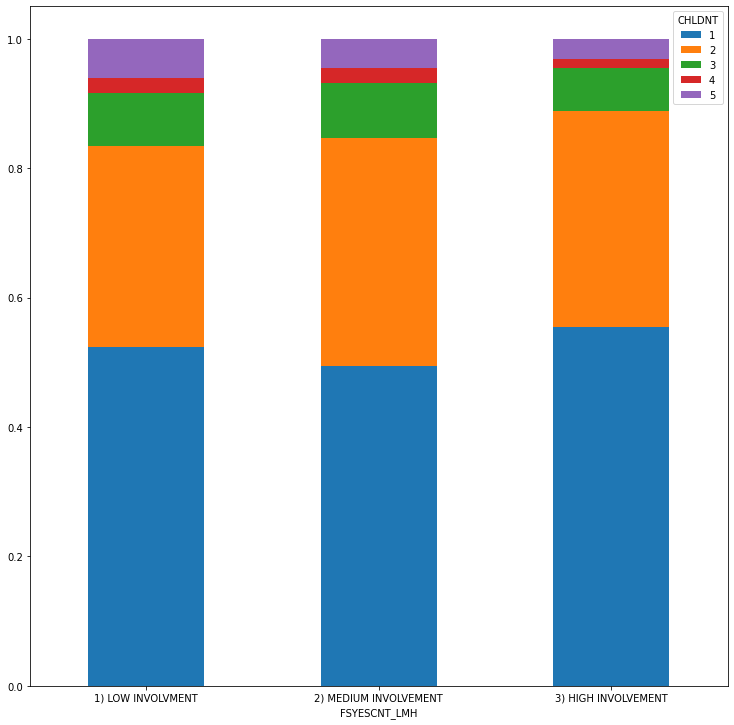

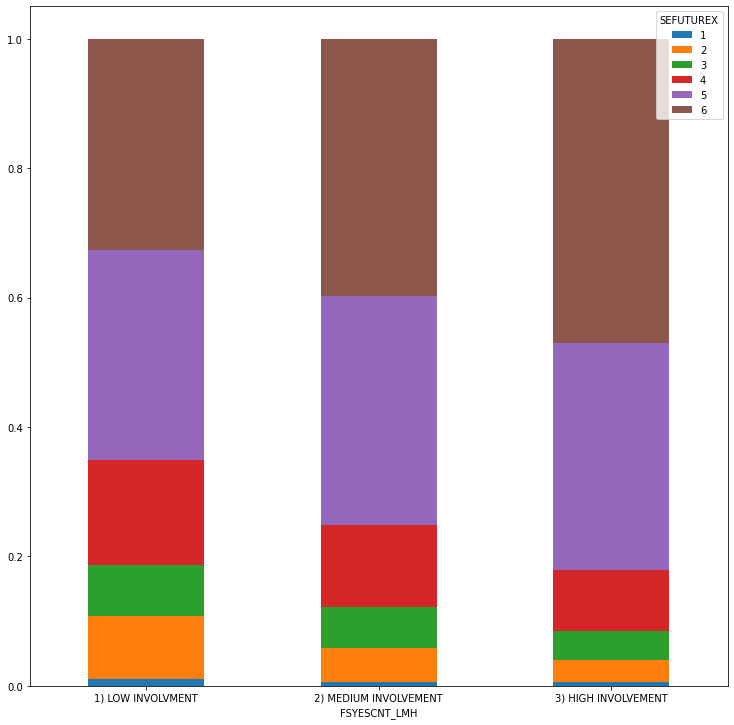

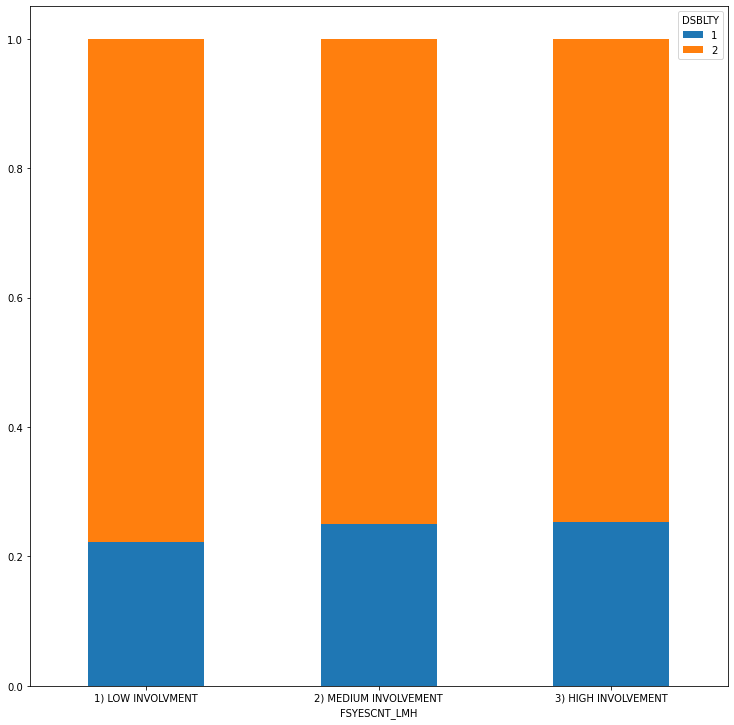

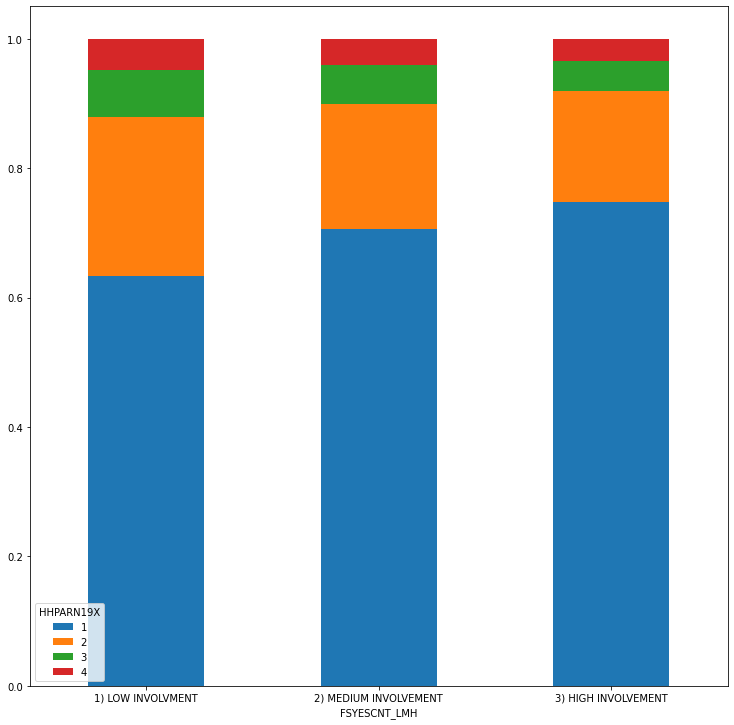

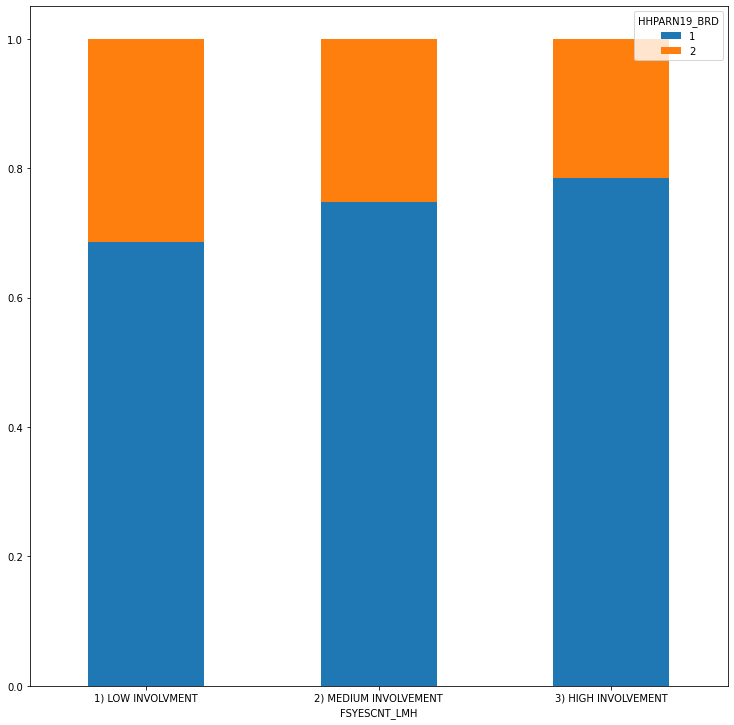

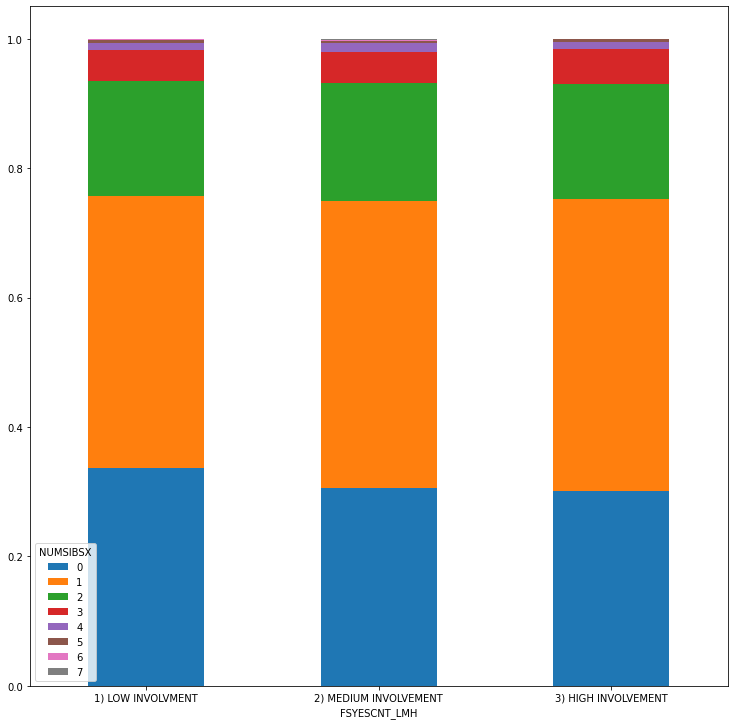

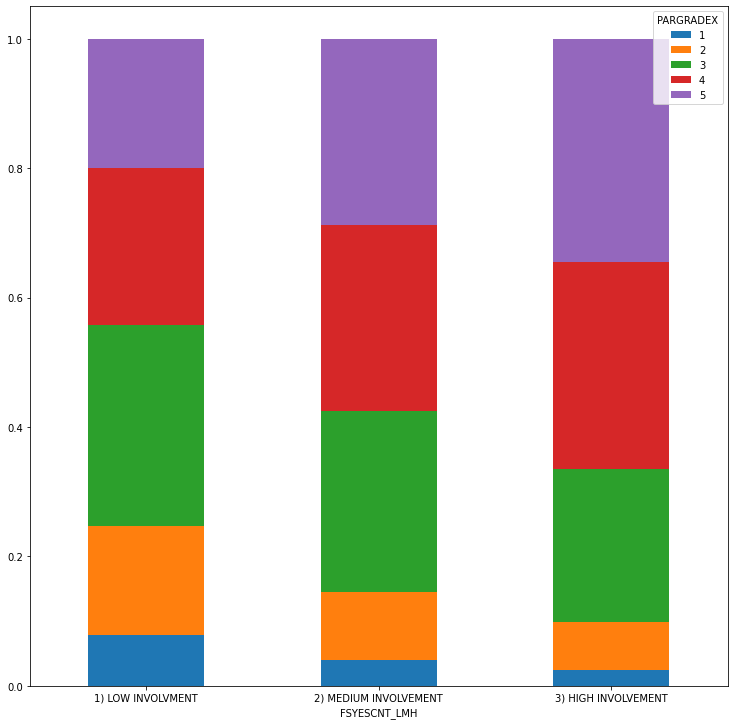

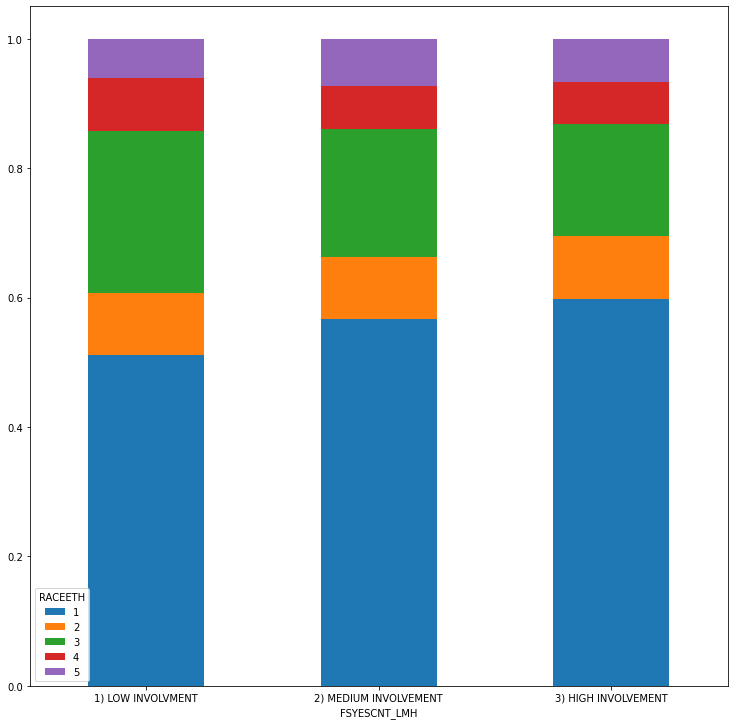

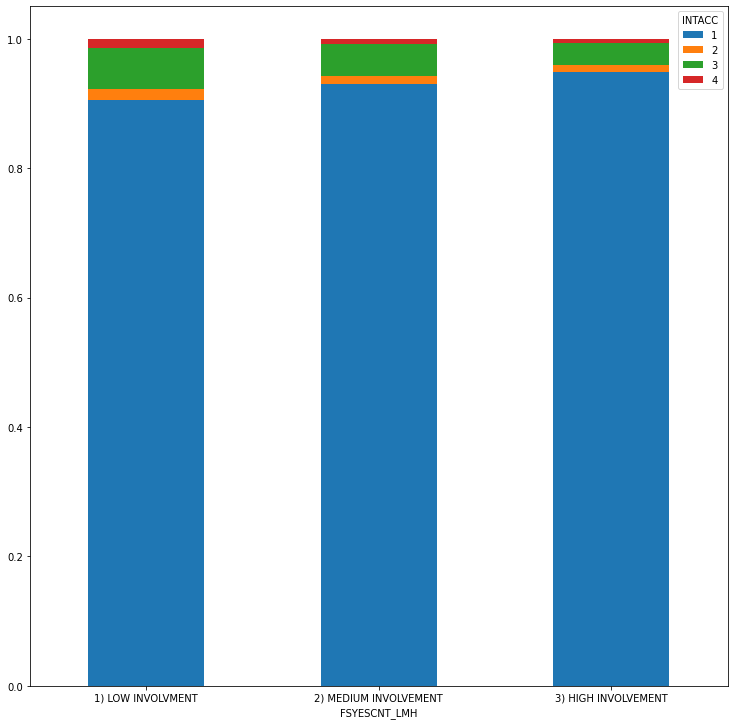

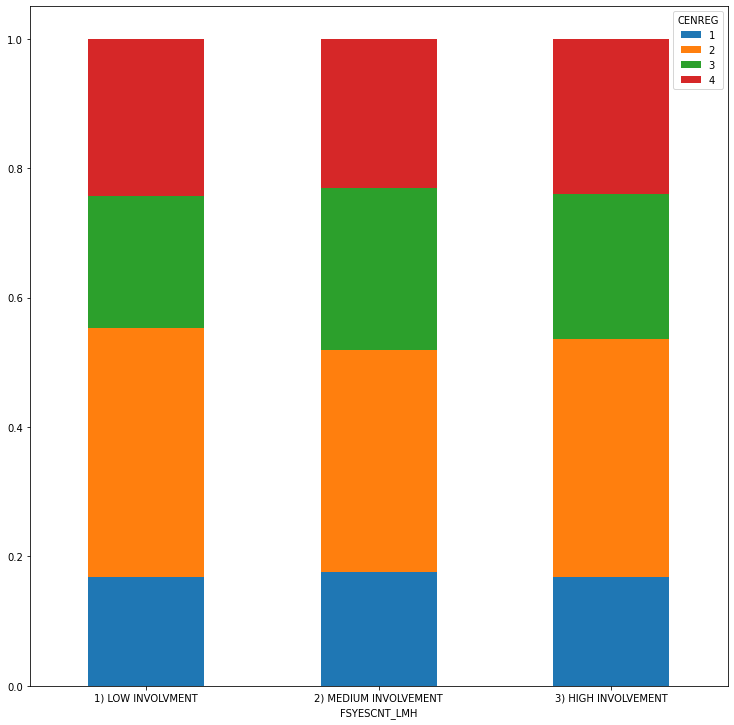

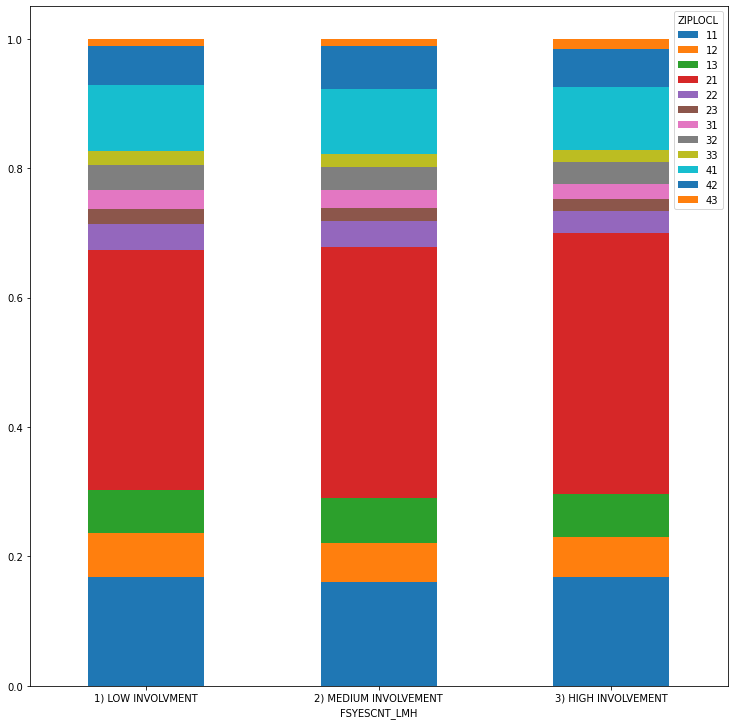

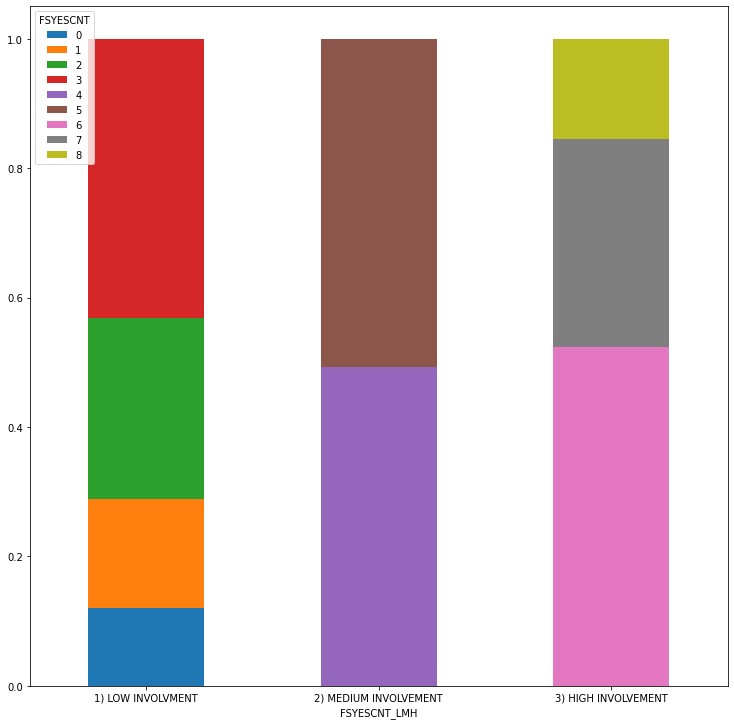

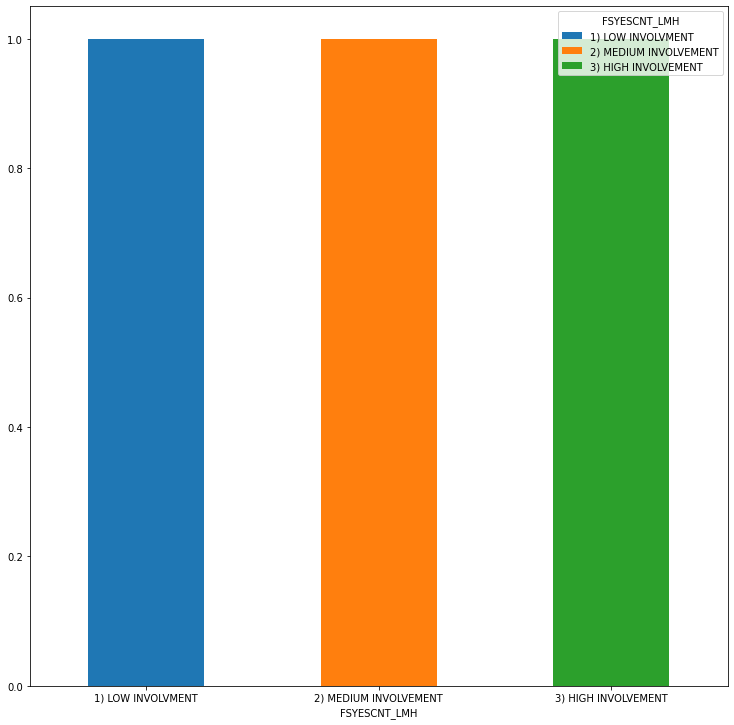

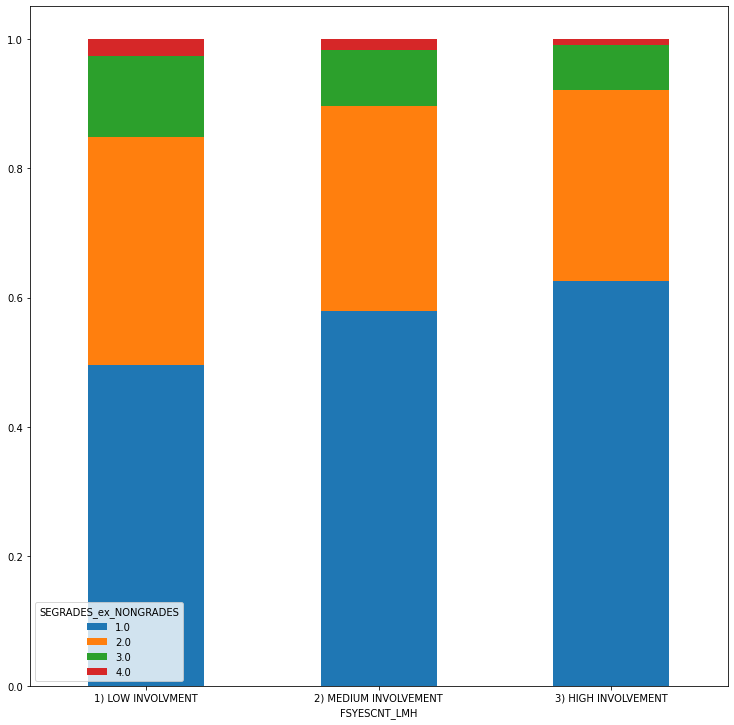

In [225]:
 #NEED TO FIX
for feature in df:
  crosstb_LMH = pd.crosstab(df.FSYESCNT_LMH, df[feature], normalize = "index")
  print("")
  crosstb_LMH.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)
  plt.show()
  plt.close() #Fixes "RunTimeWarning more than 20 figures have been opened"


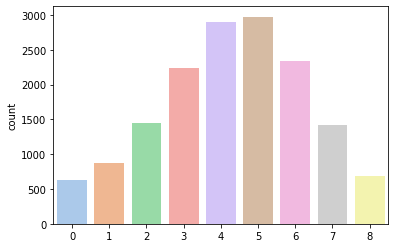

In [ ]:
#Question: How many times did you say 'Yes' to FS questions (item 60)
#Legend:  Number of 'Yes'
FSYESCNT = []
for element in df["FSYESCNT"]:
    if element != -1:
      FSYESCNT.append(element)

        
res = sns.countplot(x=FSYESCNT, palette="pastel")

0        1.0
1        NaN
2        3.0
3        1.0
4        1.0
        ... 
15495    1.0
15496    NaN
15497    1.0
15498    1.0
15499    2.0
Name: SEGRADES_ex_NONGRADES, Length: 15500, dtype: float64
Index(['1) LOW INVOLVMENT', '2) MEDIUM INVOLVEMENT', '3) HIGH INVOLVEMENT'], dtype='object', name='FSYESCNT_LMH')


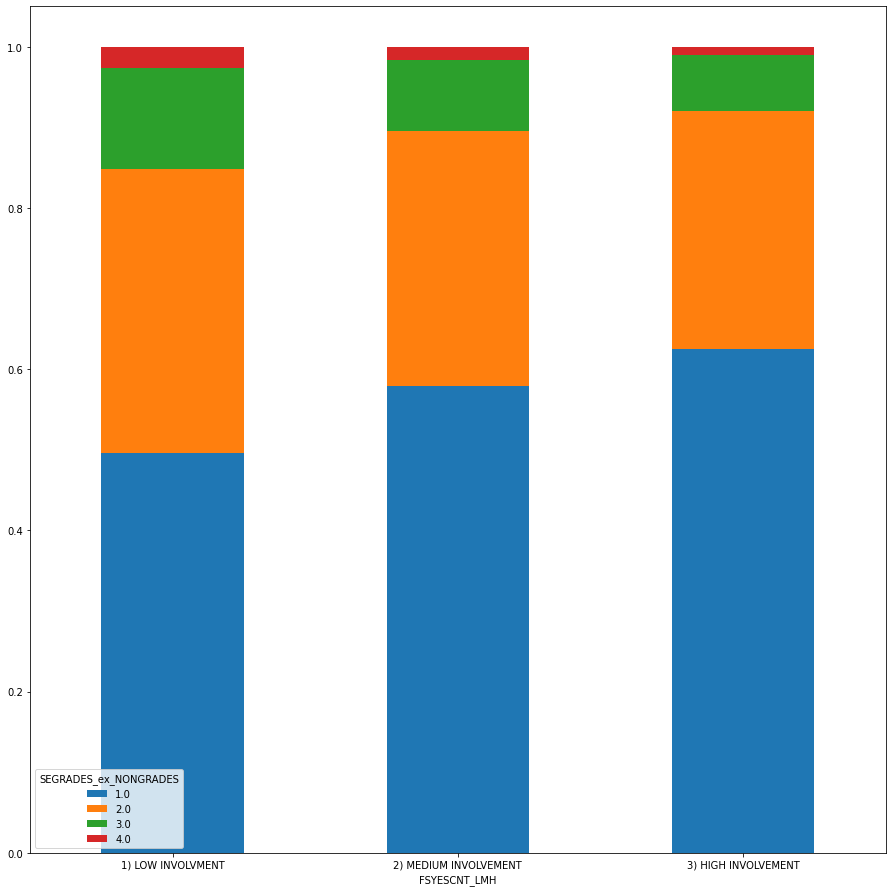

In [240]:
#Question: Please tell us about this child’s grades during this school year. Overall, across all subjects, what grades does this child get?
#Legend:  1 <- Mostly A's
#Legend:  2 <- Mostly B's
#Legend:  3 <- Mostly C's
#Legend:  4 <- Mostly D's or lower
#Legend:  5 <- School does not give grades

#Question: How many times did you say 'Yes' to FS questions (item 60)
#Legend:  Number of 'Yes'

SEGRADES_ex_NONGRADES = []
for grade in df.SEGRADES:
  if grade ==-1 or grade ==5:
    grade = None
    SEGRADES_ex_NONGRADES.append(grade)
  else:
    SEGRADES_ex_NONGRADES.append(grade)
df["SEGRADES_ex_NONGRADES"] = SEGRADES_ex_NONGRADES
print(df.SEGRADES_ex_NONGRADES)

%matplotlib inline

crosstb_LMH = pd.crosstab(df.SEGRADES_ex_NONGRADES, df.FSYESCNT_LMH, normalize="columns")

crosstb_LMH_2 = pd.crosstab(df.FSYESCNT_LMH, df.SEGRADES_ex_NONGRADES, normalize="index")
crosstb_LMH_2.plot.bar(rot=0,figsize=(12.5,12.5), stacked=True)


print(crosstb_LMH_2.index)






In [219]:
def func(values):
  display("High")

piechart = crosstb_LMH_2.plot_animated(kind="pie",steps_per_period=20,period_length = 1000, rotatelabels=False, period_fmt='')
HTML(piechart.get_html5_video())



Generating PieChart, plotting ['1.0', '2.0', '3.0', '4.0']


In [237]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
HTML(ani.to_html5_video())
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py", line 196, in process
    func(*args, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/matplotlib/animation.py", line 1467, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


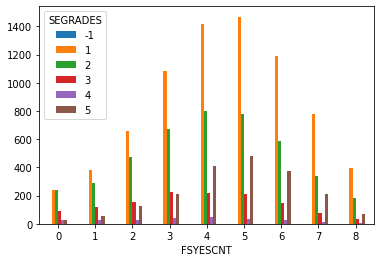

In [ ]:
#Question: Please tell us about this child’s grades during this school year. Overall, across all subjects, what grades does this child get?
#Legend:  1 <- Mostly A's
#Legend:  2 <- Mostly B's
#Legend:  3 <- Mostly C's
#Legend:  4 <- Mostly D's or lower
#Legend:  5 <- School does not give grades

#Question: How many times did you say 'Yes' to FS questions (item 60)
#Legend:  Number of 'Yes'

crosstb = pd.crosstab(df.FSYESCNT, df.SEGRADES)
barplot = crosstb.plot.bar(rot=0)

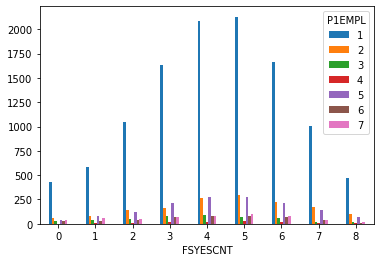

In [ ]:
#P1EMPL
#Question: Which of the following best describes this parent or guardian’s employment status?
#Legend:  1 <- Employed for pay or income
#Legend:  2 <- Self-employed
#Legend:  3 <- Unemployed or out of work
#Legend:  4 <- Full-time student
#Legend:  5 <- Stay at home parent
#Legend:  6 <- Retired
#Legend:  7 <- Disabled or unable to work

#Question: How many times did you say 'Yes' to FS questions (item 60)
#Legend:  Number of 'Yes'

crosstb = pd.crosstab(df.FSYESCNT, df.P1EMPL)
barplot = crosstb.plot.bar(rot=0)

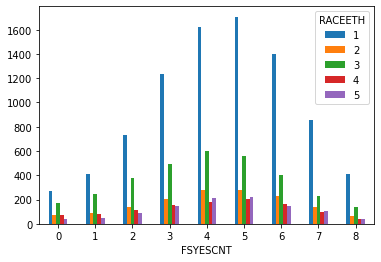

In [ ]:
#Question: Race and ethnicity of child
#Legend:  1 <- White, non-Hispanic
#Legend:  2 <- Black, non-Hispanic
#Legend:  3 <- Hispanic
#Legend:  4 <- Asian or Pacific Islander, non-Hispanic
#Legend:  5 <- All other races and multiple races, non-Hispanic

#Question: How many times did you say 'Yes' to FS questions (item 60)
#Legend:  Number of 'Yes'

crosstb = pd.crosstab(df.FSYESCNT, df.RACEETH)
barplot = crosstb.plot.bar(rot=0)

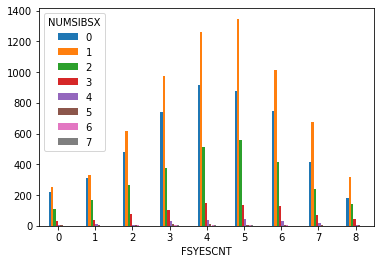

In [ ]:
#Question: Number of child’s siblings
#Legend:  Number of siblings

#Question: How many times did you say 'Yes' to FS questions (item 60)
#Legend:  Number of 'Yes'

crosstb = pd.crosstab(df.FSYESCNT, df.NUMSIBSX)
barplot = crosstb.plot.bar(rot=0)